In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan
from matplotlib import pyplot as plt
import os
#import networkx

In [2]:
colors4 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D']
colors6 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449']
colors7 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8']
colors8 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64']
colors9 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701']
colors10 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE']
colors11 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors12 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors13 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1']
colors14 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
colors15 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors16 = ['#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors17 = ['#7DDCAC', '#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

# 8 different color palettes with different amount of colors in it
colors = [colors6, colors7, colors8, colors9, colors10, colors11, colors12, colors13, colors14, colors15, colors16, colors17, colors18]
#sns.set_palette(sns.color_palette(colors18))


# new colors from color brewer (12):
colors_new = ['#8dd3c7', '#BD11A1', '#bebada', '#097E02','#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#b15928', '#6a3d9a', '#38E1F5','#1f78b4','#ff7f00', '#484848', '#ffed6f']
colors_mettalic = ['#4682bf', '#eda6c4', '#aa4069', '#ffe898','#838996', '#c3def3','#cd9575', '#c9ffe5', '#5fa777', '#001440', '#722f37', '#e18e96', '#8e88ce', '#ec5297', '#1b4d3e', '#da680f', '#3399ff', '#d9b611']
sns.set_palette(sns.color_palette(colors_new))

In [3]:
roi_labels = np.load('/Users/jenniferthem/Masterthesis_Data/roi_labels.npy', allow_pickle=True)
roi_labels_df = pd.DataFrame(roi_labels)
# load the Correlation matrices
baseline_mat = np.load('/Users/jenniferthem/Masterthesis_Data/corr_dist_df_baseline.npy')
ket_mat = np.load('/Users/jenniferthem/Masterthesis_Data/Ketamine_corr_dist.npy')
placebo_mat = np.load('/Users/jenniferthem/Masterthesis_Data/Placebo_corr_dist.npy')

In [ ]:
# load pickle umap_p and umap_p2
#/Users/jenniferthem/Masterthesis_Data/UMAP_Placebo_2.npy -->umap_p2
#/Users/jenniferthem/Masterthesis_Data/UMAP_Placebo_3.npy --> umap_p

## Functions

In [43]:
# data, neighbors: how many next neighbors: int, name: how to call the resulting file: String, sav_path: output directory: string, roi_labels_df: DataFrame
def analysis_embedding_clustering(data, neighbors, metric, name, sav_path, cluster_selection_method, roi_labels_df):
    
    # UMAP embedding
    embedding = umap.UMAP(
        n_neighbors=neighbors,
        n_components=2,
        min_dist=0.0, # best for clustering
        metric=metric
    ).fit_transform(data)
    
    # save umap results as dataframe
    embedding_df = pd.DataFrame(embedding)
    # set name for saving
    name_umap = 'UMAP_' + name
    # save umap result
    np.save(os.path.join(sav_path, name_umap), embedding)

    # plot the embedding 
    %matplotlib notebook
    plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral');
    plt.title('UMAP Projection', fontsize=18);
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    # save plot
    plt.savefig(os.path.join(sav_path, 'Plots', name_umap), dpi=250)
    
    
    # HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    
    clusterer_hdb = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        gen_min_span_tree=True,
        cluster_selection_method=cluster_selection_method
    ).fit(embedding)
    
    
    num_labels = np.amax(labels)+1
    
        
    clustered = (labels >= 0)
    
    labels_df = pd.DataFrame(labels)
    
    # concatenation of umap results and roi labels
    UMAP_roi_df = pd.concat([embedding_df, roi_labels_df], axis=1)
    # renaming
    UMAP_roi_df.columns = ['x', 'y', 'ROI']
    # saving dataframe
    name_sav_umap_roi = 'UMAP_ROI_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_roi))
    
    # concatenation of umap results and hdbscan labels
    UMAP_hdbscan_labels_df = pd.concat([embedding_df, labels_df], axis =1)
    # renaming 
    UMAP_hdbscan_labels_df.columns = ['x', 'y', 'class']
    # saving dataframe
    name_sav_umap_hdbscan = 'UMAP_HDBScan_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_hdbscan))
    
    # UMAP results with HDBScan label & ROI label
    UMAP_hdbscan_roi = pd.concat([UMAP_hdbscan_labels_df, roi_labels_df], axis=1)
    UMAP_hdbscan_roi.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
    name_sav_all = 'UMAP_HDBScan_ROI_' + name
    UMAP_hdbscan_roi.to_pickle(os.path.join(sav_path, name_sav_all))
    
    percent_clustered = (np.sum(clustered) / embedding.shape[0])*100
    print(percent_clustered, '% of the data points were clustered')
    print('The HDBScan clustering yielded ', num_labels, ' classes')
    
    return embedding, num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer_hdb


In [44]:
# data has to have form of x, y, class DataFrame, clustered: np array
def plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    %matplotlib notebook
    plot = sns.scatterplot(x="x", y="y", hue='class', data=UMAP_hdbscan_labels_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    hdbscan_plot = 'hdbscan_plot_' +  name
    #plt.title('HDBScan clustering', fontsize=18)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.savefig(os.path.join(sav_path, 'Plots', hdbscan_plot), dpi=250)
    

In [42]:
def plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    %matplotlib notebook
    sp = sns.scatterplot(x="x", y="y", hue='ROI', data=UMAP_roi_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    roi_plot = 'hdbscan_roi_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', roi_plot), dpi=250)

In [7]:
# input: df containing x & y from UMAP, HDBScanlabel & ROI label, n_class: number of classes from hdbscan, keys: list of ROIs
# keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']
# name_hhdbscan: 'HDBScanLabel' - String
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']

def create_cluster_roi_df(clu_roi_df, n_class, keys, name_hdbscan, path):
    count = 0
    clu_list = []
    # while loop to create a list of clusters
    while count < np.amax(n_class):
        # list of clusters
        # 'HDBSCanLabel can be replaced with name_hdbscan'
        
        clu_list.append(clu_roi_df.loc[clu_roi_df['HDBScanLabel']==count])
        count = count+1
        
    
    clu_list
    # initializing dic
    clu_roi_dic = {}    
    count_clu = 0
    
    # loop through all clusters
    while(count_clu < np.amax(n_class)):
        # name of the cluster
        str_count = 'Cluster_' + str(count_clu)
        # initializing nested dic
        clu_roi_dic[str_count] = {}
        # index for the list of clusters
        clu_it = 0
        for entry in keys:
            clu = clu_list[count_clu]    
            # filling nested dictionary
            clu_roi_dic[str_count][entry] = (clu.ROI.values == entry).sum()
            
            
        count_clu = count_clu+1
        
        clu_roi_df = pd.DataFrame.from_dict(clu_roi_dic, orient='index')
        
        
        clu_roi_df.to_pickle(os.path.join(path, 'cluster_roi_df'))

    return clu_roi_df


# Tests

### Baseline

In [ ]:
[embedding_b, num_labels_b, UMAP_hdbscan_labels_df_b, UMAP_roi_df_b, clustered_b, UMAP_hdbscan_roi_b, clusterer_b] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


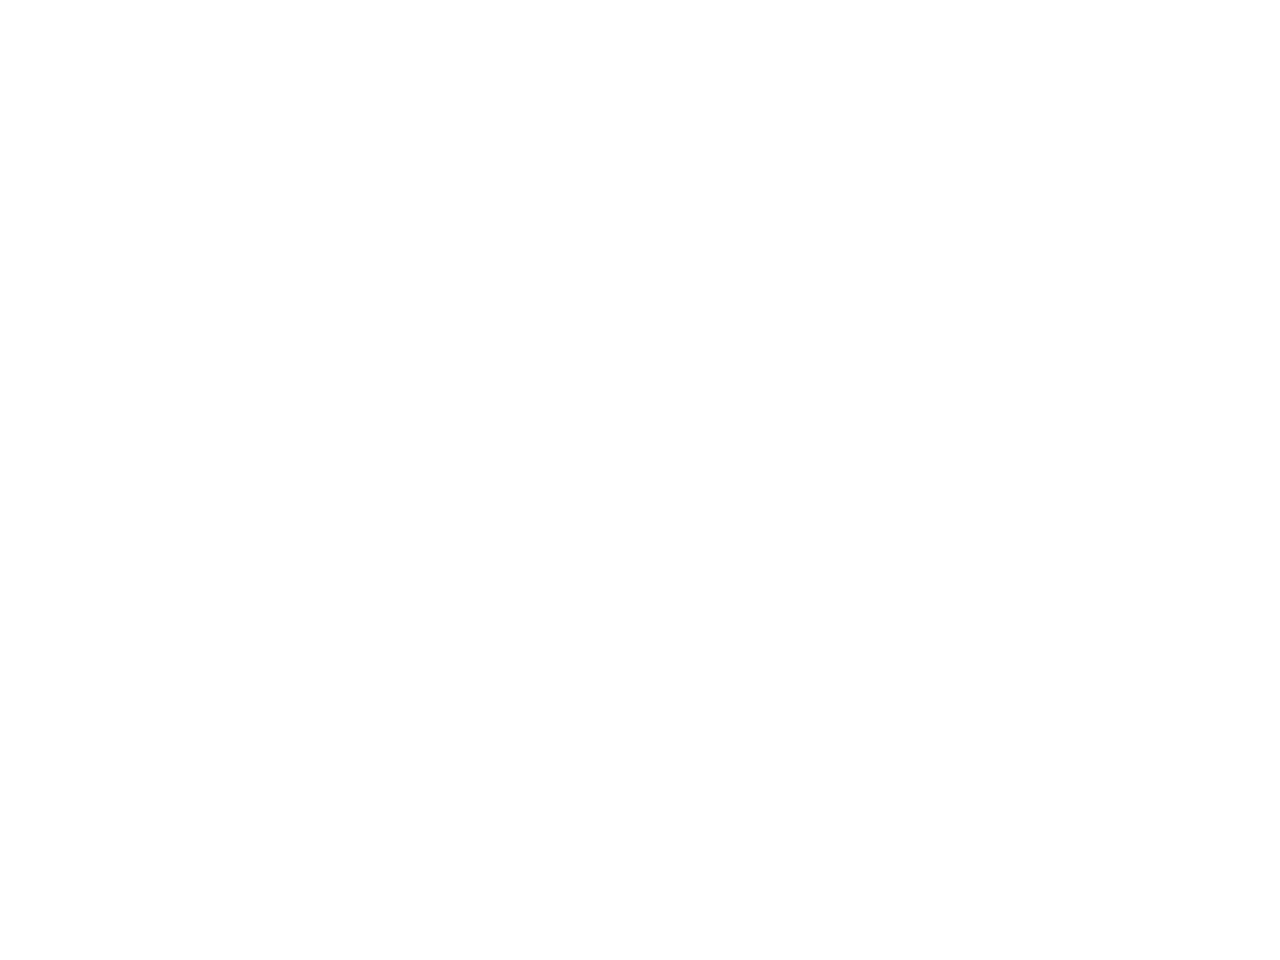

98.49364638559285 % of the data points were clustered
The HDBScan clustering yielded  9  classes


In [28]:
[embedding_b3, num_labels_b3, UMAP_hdbscan_labels_df_b3, UMAP_roi_df_b3, clustered_b3, UMAP_hdbscan_roi_b3, clusterer_b3] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline3', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


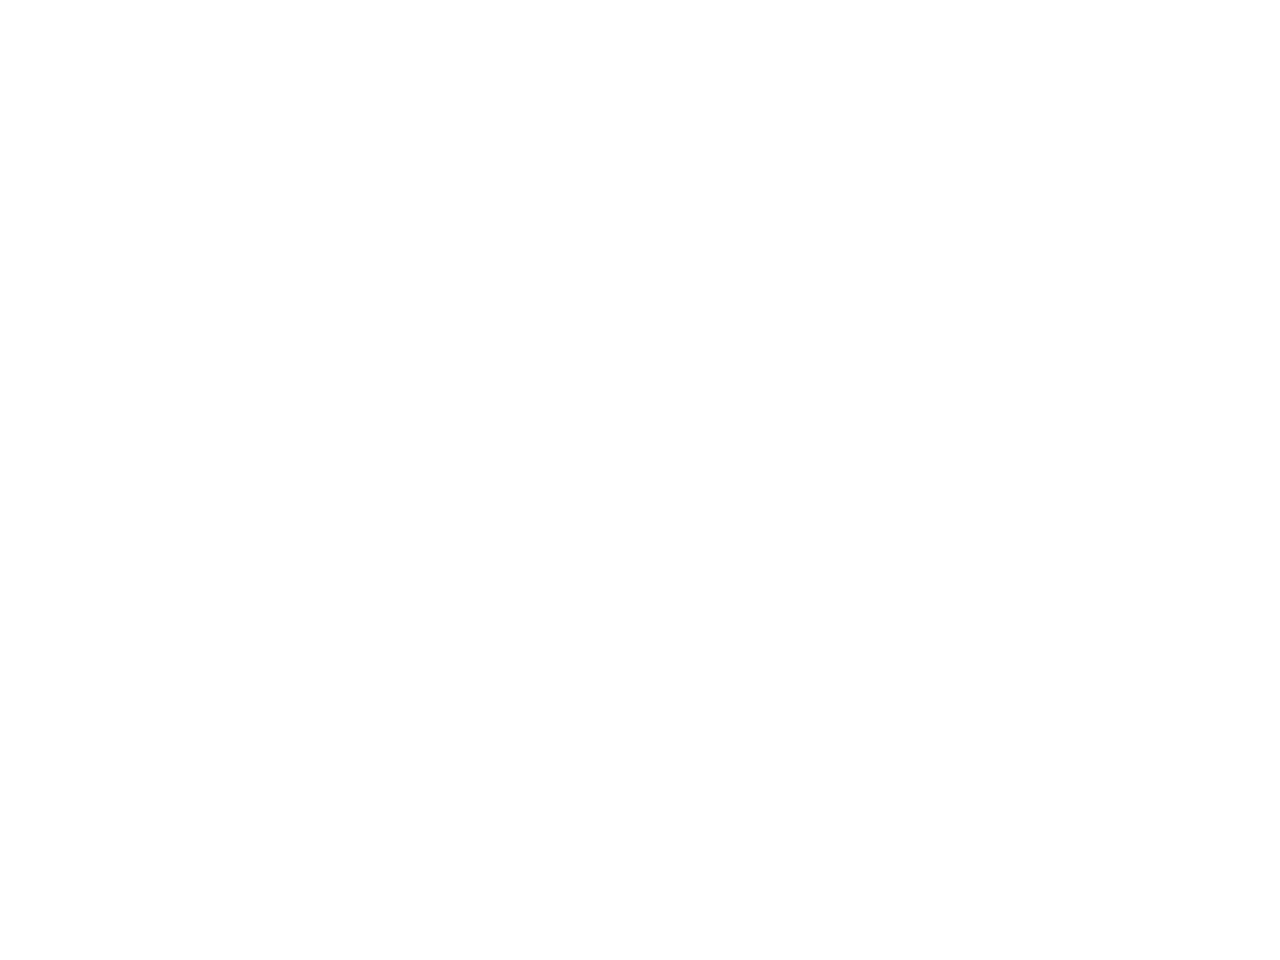

96.3056467222082 % of the data points were clustered
The HDBScan clustering yielded  9  classes


In [29]:
[embedding_b4, num_labels_b4, UMAP_hdbscan_labels_df_b4, UMAP_roi_df_b4, clustered_b4, UMAP_hdbscan_roi_b4, clusterer_b4] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline4', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


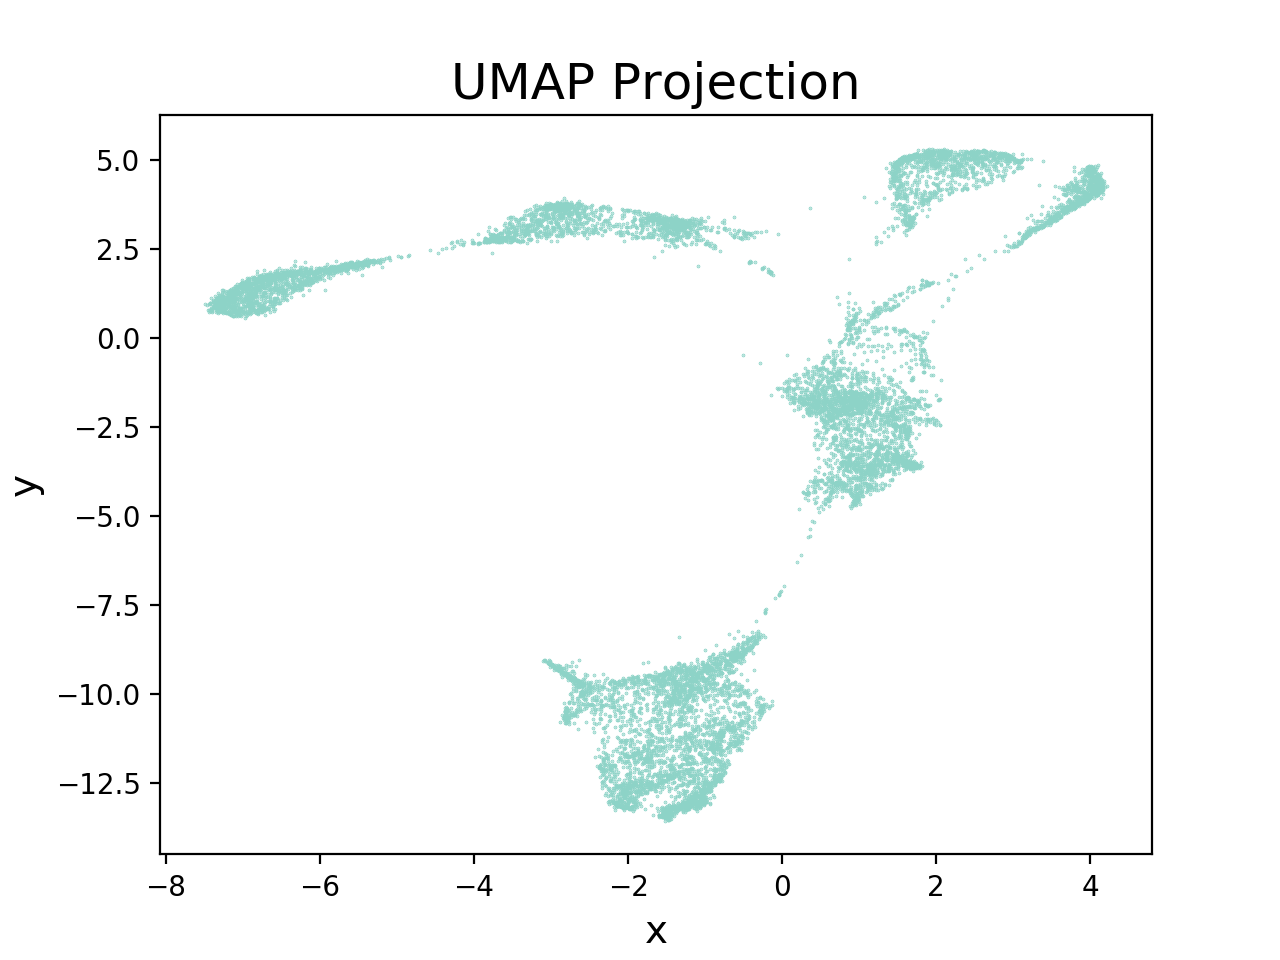

99.0911386013633 % of the data points were clustered
The HDBScan clustering yielded  7  classes


In [30]:
[embedding_b5, num_labels_b5, UMAP_hdbscan_labels_df_b5, UMAP_roi_df_b5, clustered_b5, UMAP_hdbscan_roi_b5, clusterer_b5] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline5', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

In [26]:
UMAP_hdbscan_labels_df_b

9

<IPython.core.display.Javascript object>


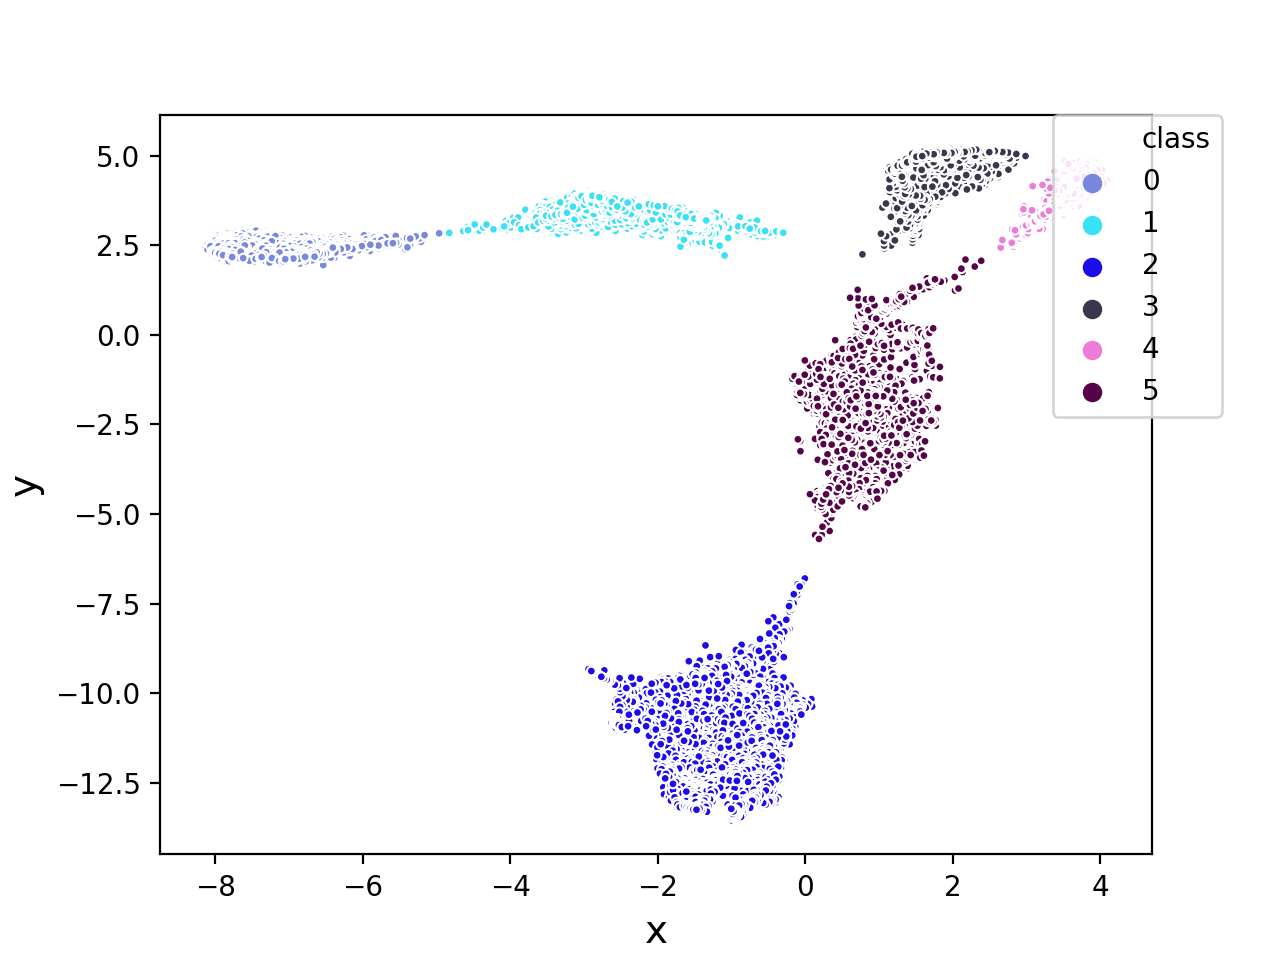

In [47]:
plotting_hdbscan(UMAP_hdbscan_labels_df_b, UMAP_roi_df_b, clustered_b, colors6, '/Users/jenniferthem/Masterthesis_Data', 'Baseline2')

<IPython.core.display.Javascript object>


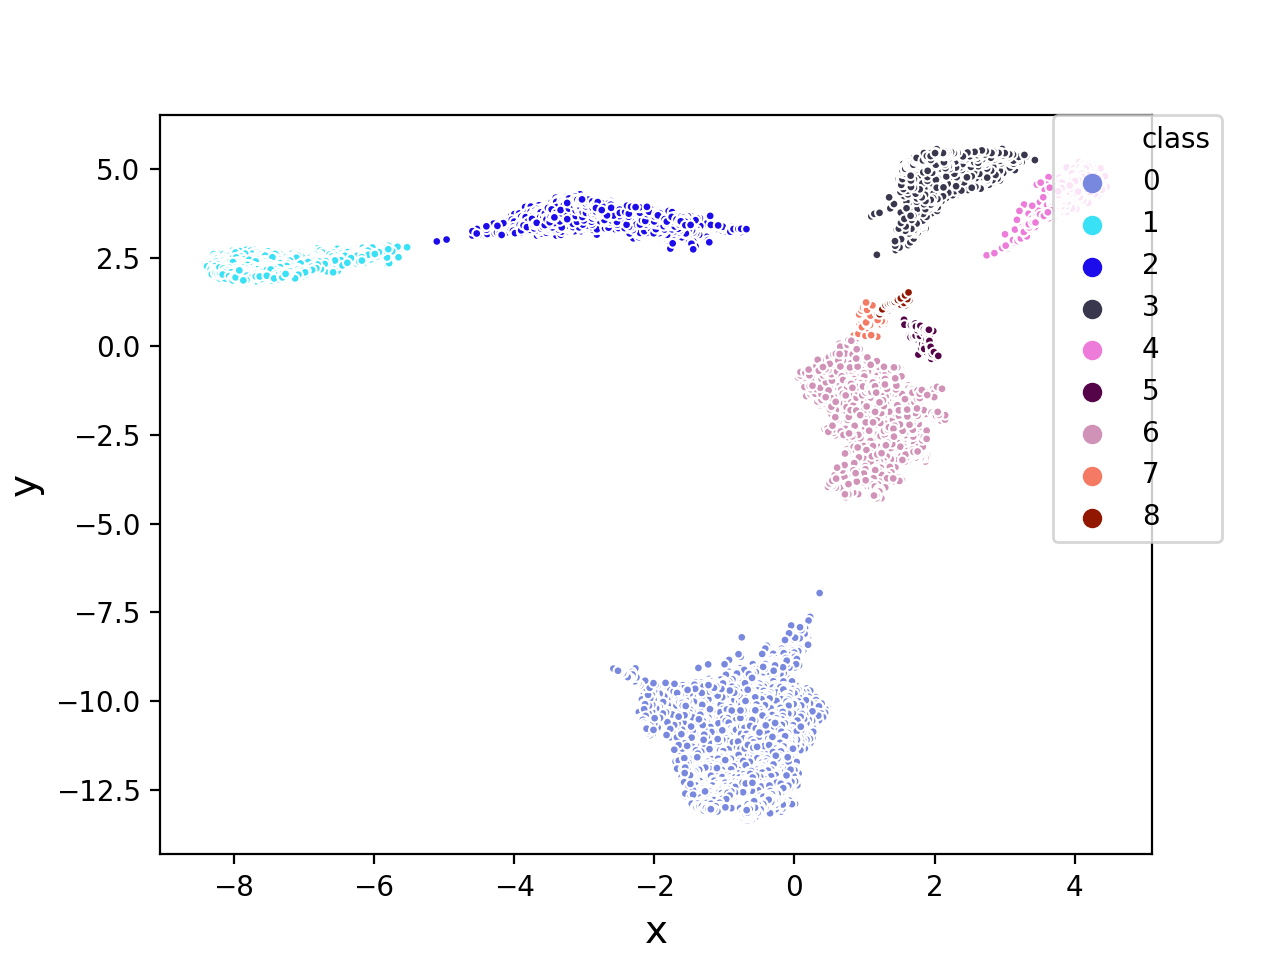

In [46]:
plotting_hdbscan(UMAP_hdbscan_labels_df_b3, UMAP_roi_df_b3, clustered_b3, colors9, '/Users/jenniferthem/Masterthesis_Data', 'Baseline3')

<IPython.core.display.Javascript object>


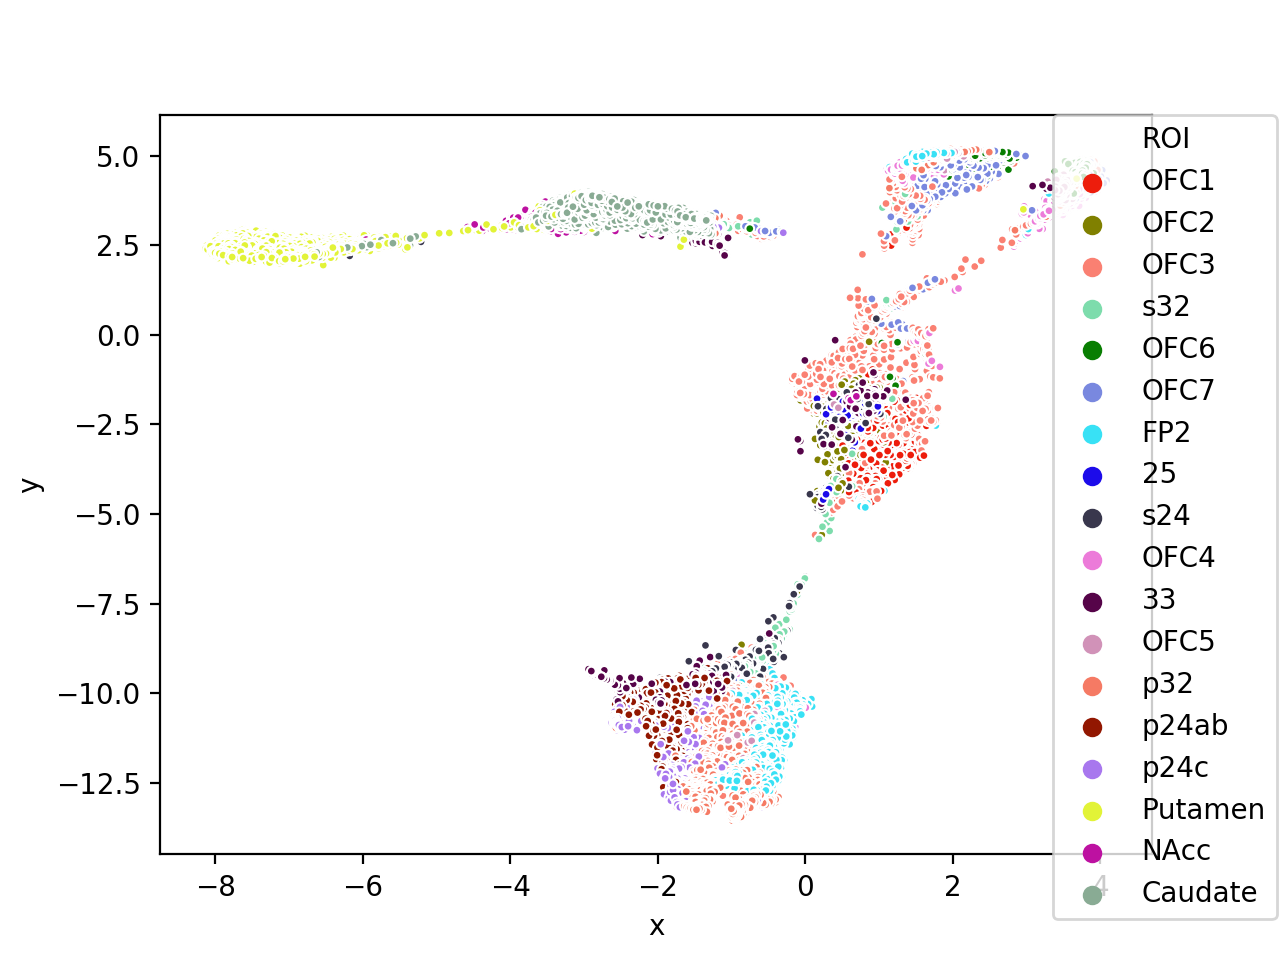

In [39]:
plotting_rois(UMAP_hdbscan_labels_df_b, UMAP_roi_df_b, clustered_b, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Baseline')

In [13]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_b, 10, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2   25  s24   33  \
Cluster_0     3     8    52    30    55    23    24  251  723    0  204  272   
Cluster_1    18     0   245   201   148   256   189   11   65    0    0    0   
Cluster_2     0     0     0     0     0     0     0    0    0    0    2    0   
Cluster_3     0     0    48   205   135   261   129    1   16    0    0    4   
Cluster_4     3     0    28     0     0     0     5   15    0    0    1   50   
Cluster_5     0     0    56     6     0     5     8    0    0    0    0    0   
Cluster_6     0     2   157     0     0     2    12   12    0    0    1    0   
Cluster_7   659   651   786     0     3     4     2   41   22  128   97   71   
Cluster_8     0     0     0     0     0     0     0    0    0    0    0    0   
Cluster_9     0     0     0     0     0     0     0    0    0    0    0    4   

            p32  p24ab  p24c  Putamen  NAcc  Caudate  
Cluster_0  1349    419   460        1     0        0  
Cluster_1    32      0     0        0     0        0  
Cluster_2     0      0     0     1583    12       35  
Cluster_3    17      0     1        2     0        0  
Cluster_4    39      0    10        5     7      366  
Cluster_5     0      0     0        0     0        0  
Cluster_6     0      0     0        0     0        0  
Cluster_7     0      0     0        0     4        0  
Cluster_8     0      0     0       18     3      364  
Cluster_9     0      0     0       39   124       95

### Ketamine

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


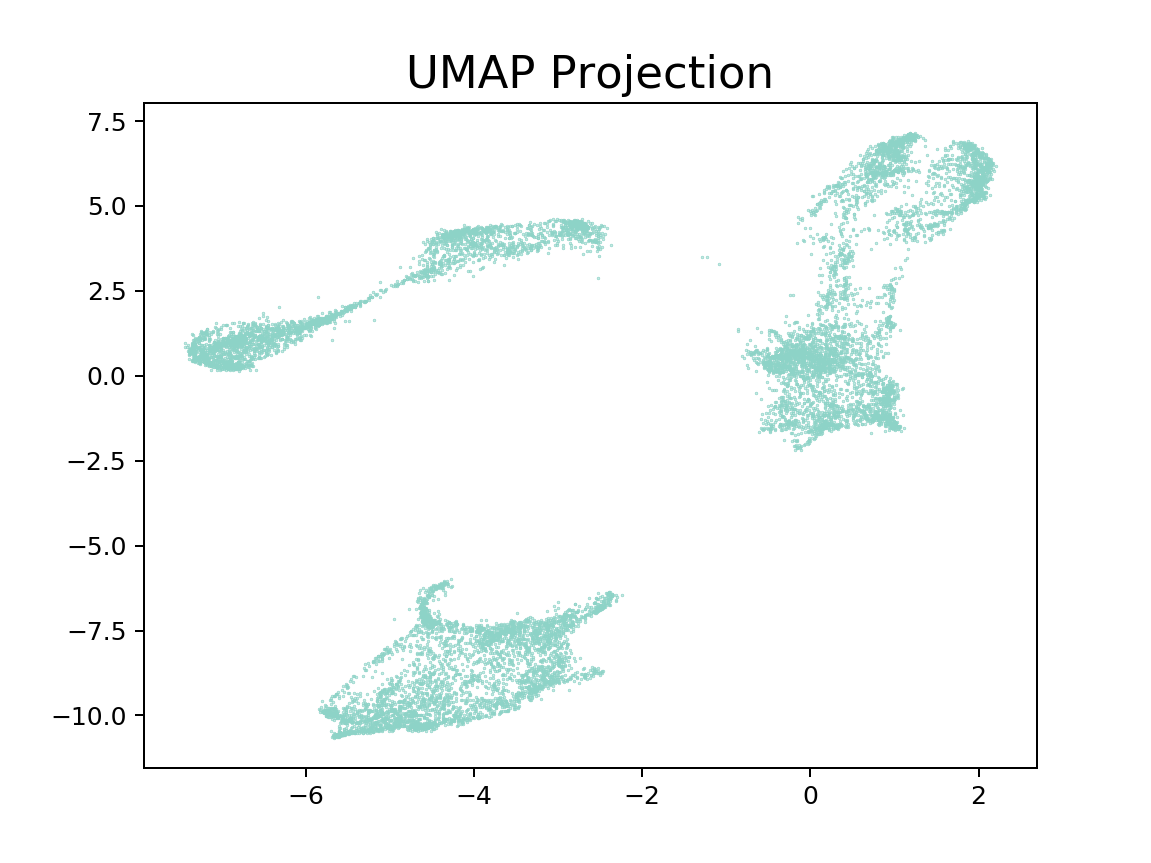

97.82041571993604 % of the data points were clustered
The HDBScan clustering yielded  7  classes


In [30]:
[num_labels_k, UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, UMAP_hdbscan_roi_k, clusterer_k] = analysis_embedding_clustering(ket_mat, 80, 'precomputed', 'Ketamine2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


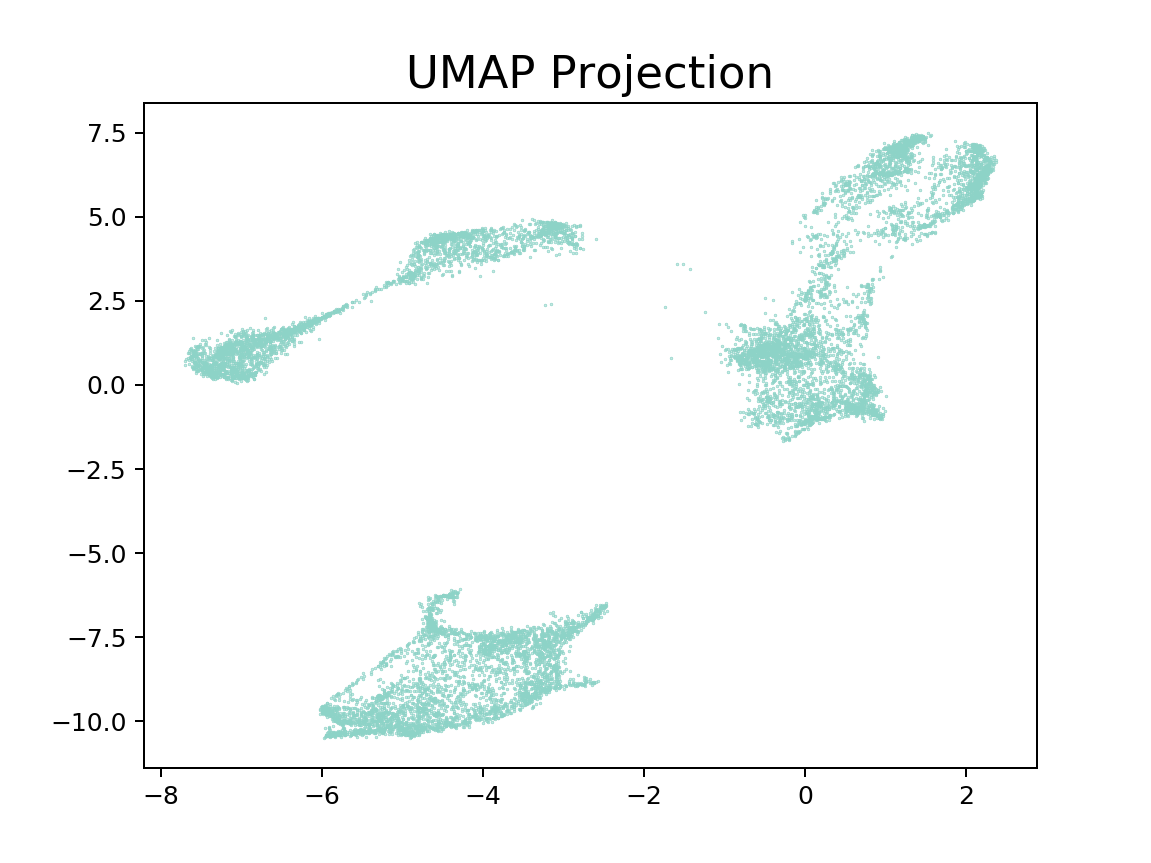

87.92392493478079 % of the data points were clustered
The HDBScan clustering yielded  18  classes


In [29]:
[num_labels_k, UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, UMAP_hdbscan_roi_k, clusterer_k] = analysis_embedding_clustering(ket_mat, 80, 'precomputed', 'Ketamine3', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


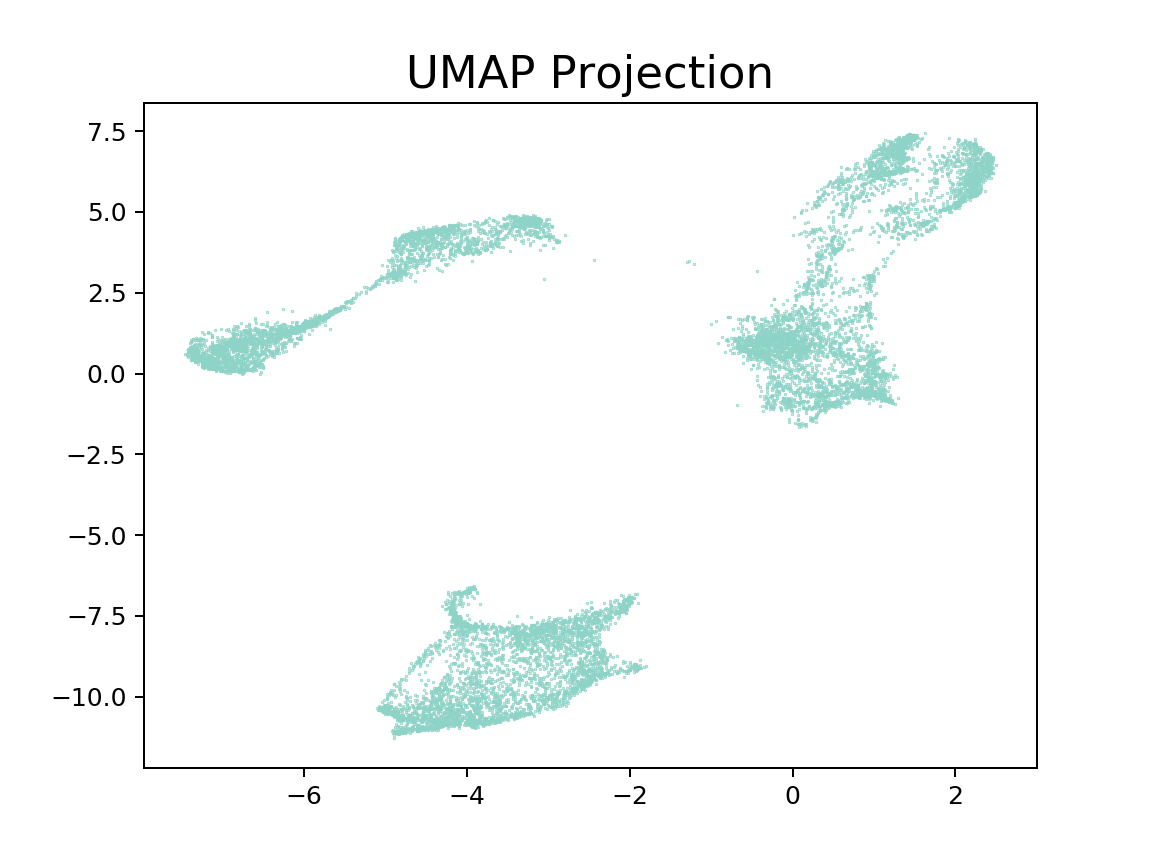

97.47538500378693 % of the data points were clustered
The HDBScan clustering yielded  7  classes


In [15]:
[num_labels_k, UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, UMAP_hdbscan_roi_k, clusterer_k] = analysis_embedding_clustering(ket_mat, 80, 'precomputed', 'Ketamine', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

<IPython.core.display.Javascript object>


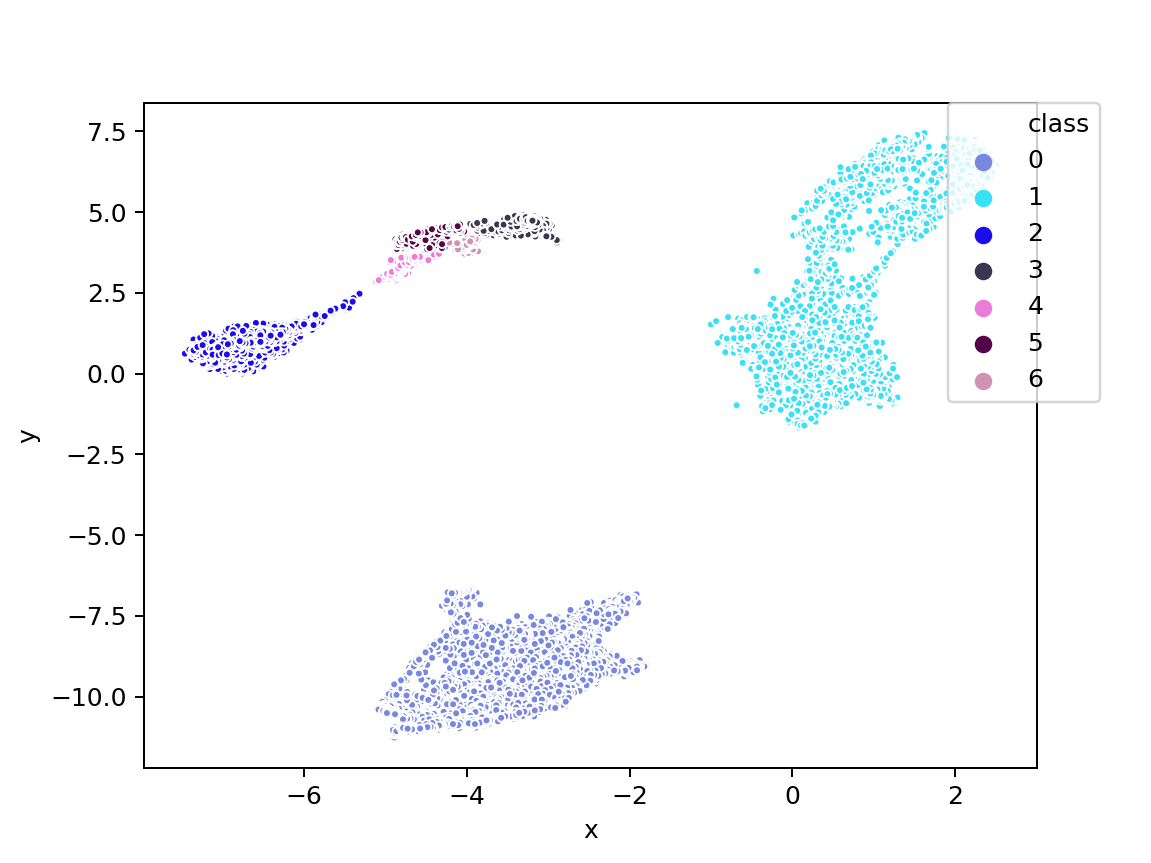

In [16]:
plotting_hdbscan(UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, colors7, '/Users/jenniferthem/Masterthesis_Data', 'Ketamine')

<IPython.core.display.Javascript object>


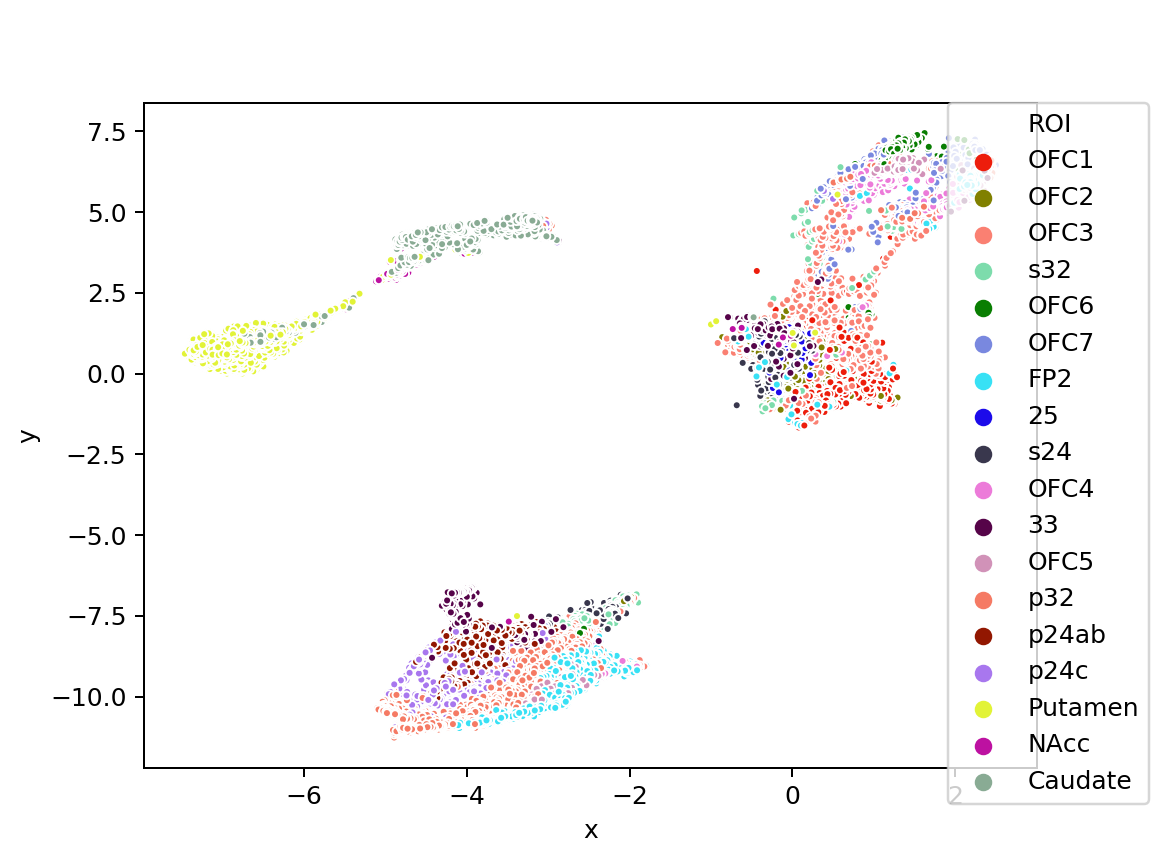

In [17]:
plotting_rois(UMAP_hdbscan_labels_df_k, UMAP_roi_df_k, clustered_k, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Ketamine')

In [19]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_k, 7, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

OFC1  OFC2  OFC3  OFC4  OFC5  OFC6  OFC7  s32  FP2   25  s24   33  \
Cluster_0     8     5    68    30    58    22    23  250  725    4  193  314   
Cluster_1   682   666  1392   417   283   534   370  100  101  124  112   95   
Cluster_2     0     0     0     0     0     0     0    0    0    0    0    4   
Cluster_3     0     1     6     0     0     0     1    2    0    0    2   16   
Cluster_4     0     0     0     0     0     0     0    0    0    0    0    0   
Cluster_5     0     0     0     0     0     0     0    0    0    0    0    0   
Cluster_6     0     1     0     0     0     0     0    0    0    0    0    0   

            p32  p24ab  p24c  Putamen  NAcc  Caudate  
Cluster_0  1367    419   459        1     1        0  
Cluster_1    51      0     3        7     5        1  
Cluster_2     0      0     0     1571    15       34  
Cluster_3    24      0    10        3     3      357  
Cluster_4     0      0     0       23    98       40  
Cluster_5     0      0     0       19     4      385  
Cluster_6     0      0     0        3     7       64

Placebo

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


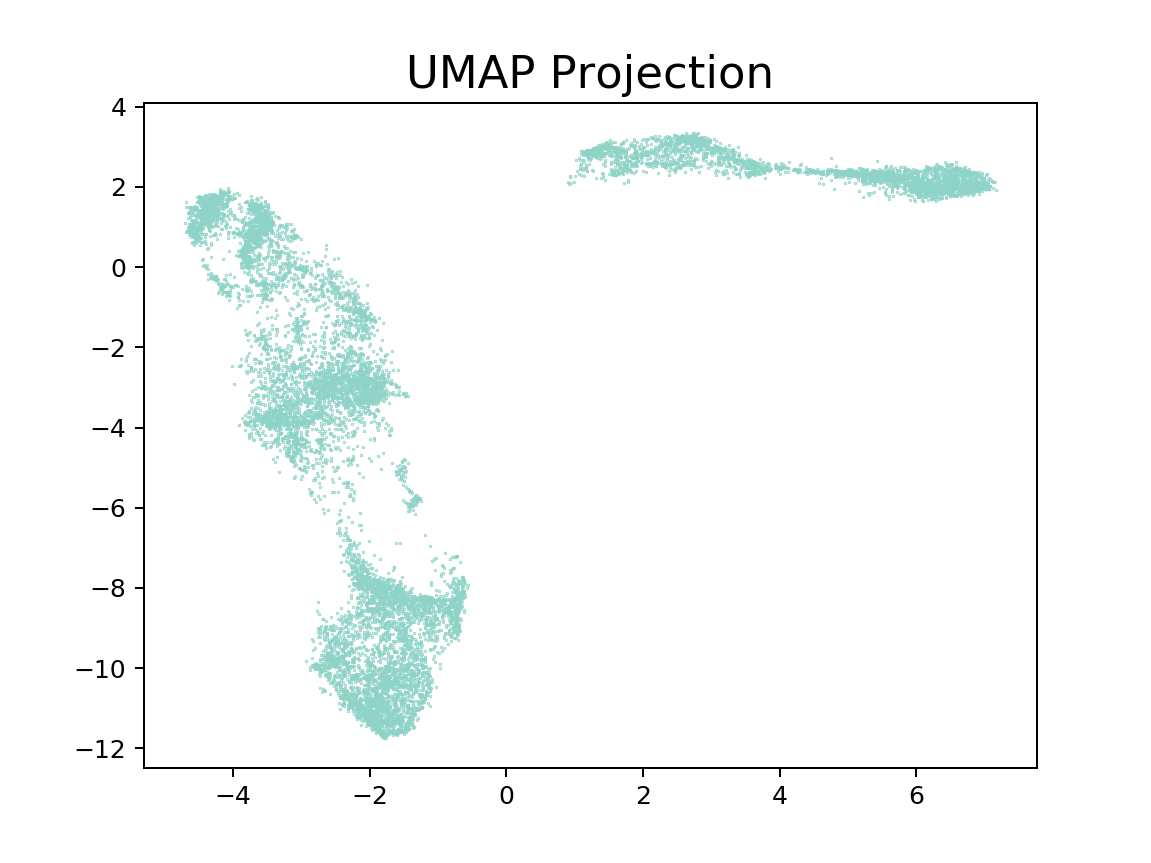

94.336447025162 % of the data points were clustered
The HDBScan clustering yielded  13  classes


In [22]:
[num_labels_p, UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, UMAP_hdbscan_roi_p, clusterer_p] = analysis_embedding_clustering(placebo_mat, 80, 'precomputed', 'Placebo', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

umap_p2 for further investigation

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


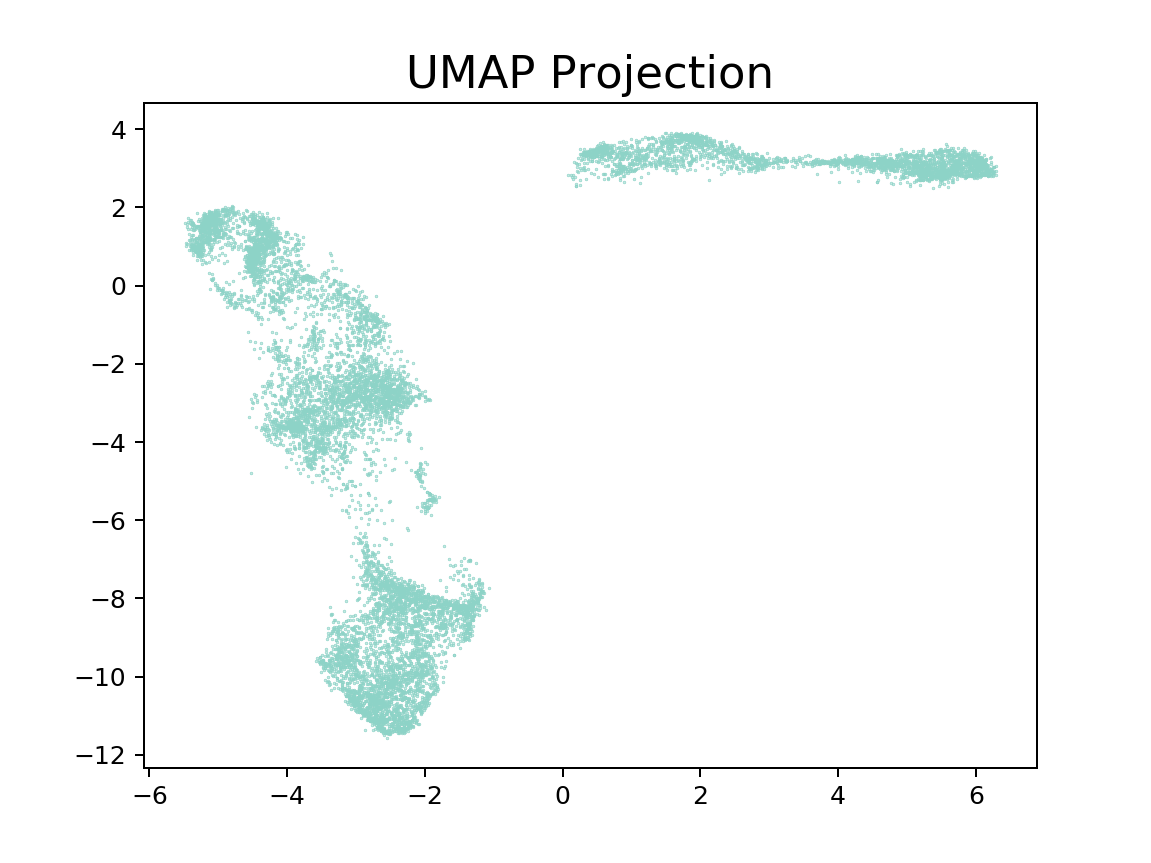

87.96600185138433 % of the data points were clustered
The HDBScan clustering yielded  17  classes


In [42]:
[umap_p2, num_labels_p2, UMAP_hdbscan_labels_df_p2, UMAP_roi_df_p2, clustered_p2, UMAP_hdbscan_roi_p2, clusterer_p2] = analysis_embedding_clustering(placebo_mat, 80, 'precomputed', 'Placebo_2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


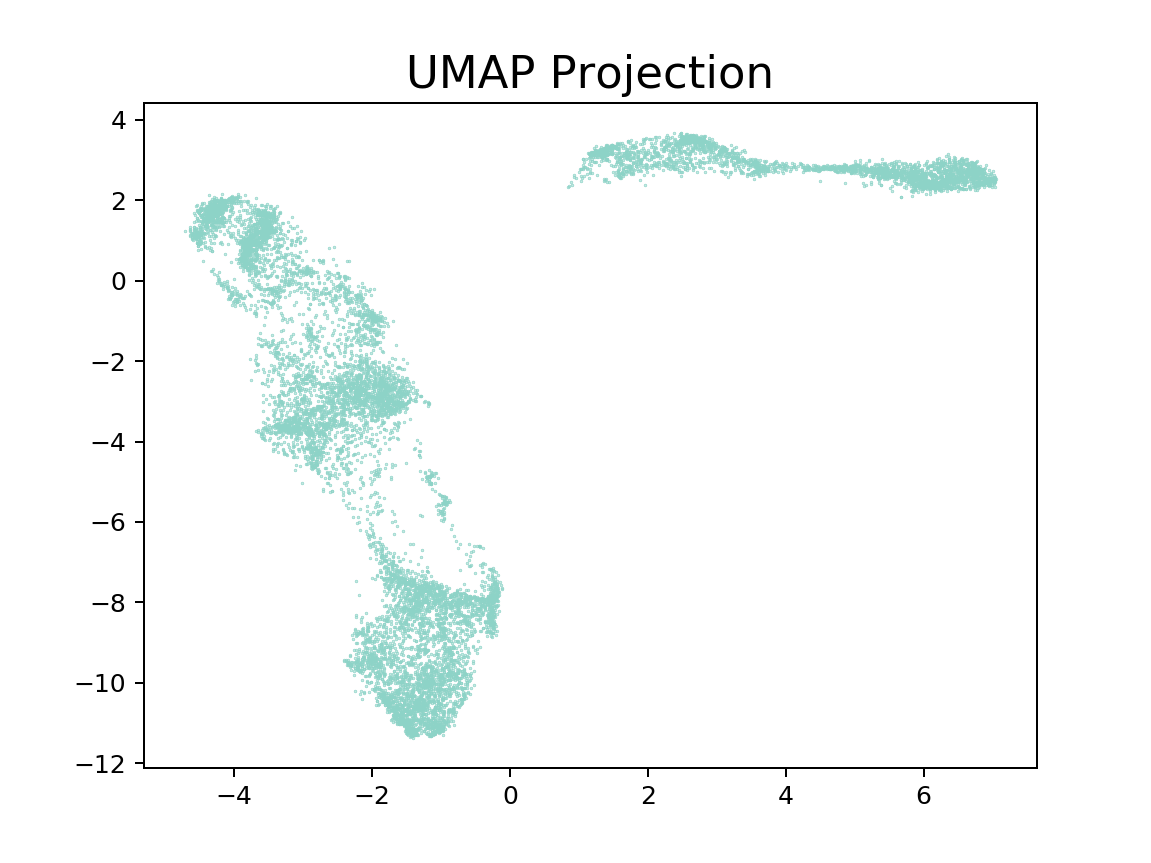

92.98998569384835 % of the data points were clustered
The HDBScan clustering yielded  13  classes


In [23]:
[num_labels_p2, UMAP_hdbscan_labels_df_p2, UMAP_roi_df_p2, clustered_p2, UMAP_hdbscan_roi_p2, clusterer_p2] = analysis_embedding_clustering(placebo_mat, 80, 'precomputed', 'Placebo_2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

umap_p for further investigation

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


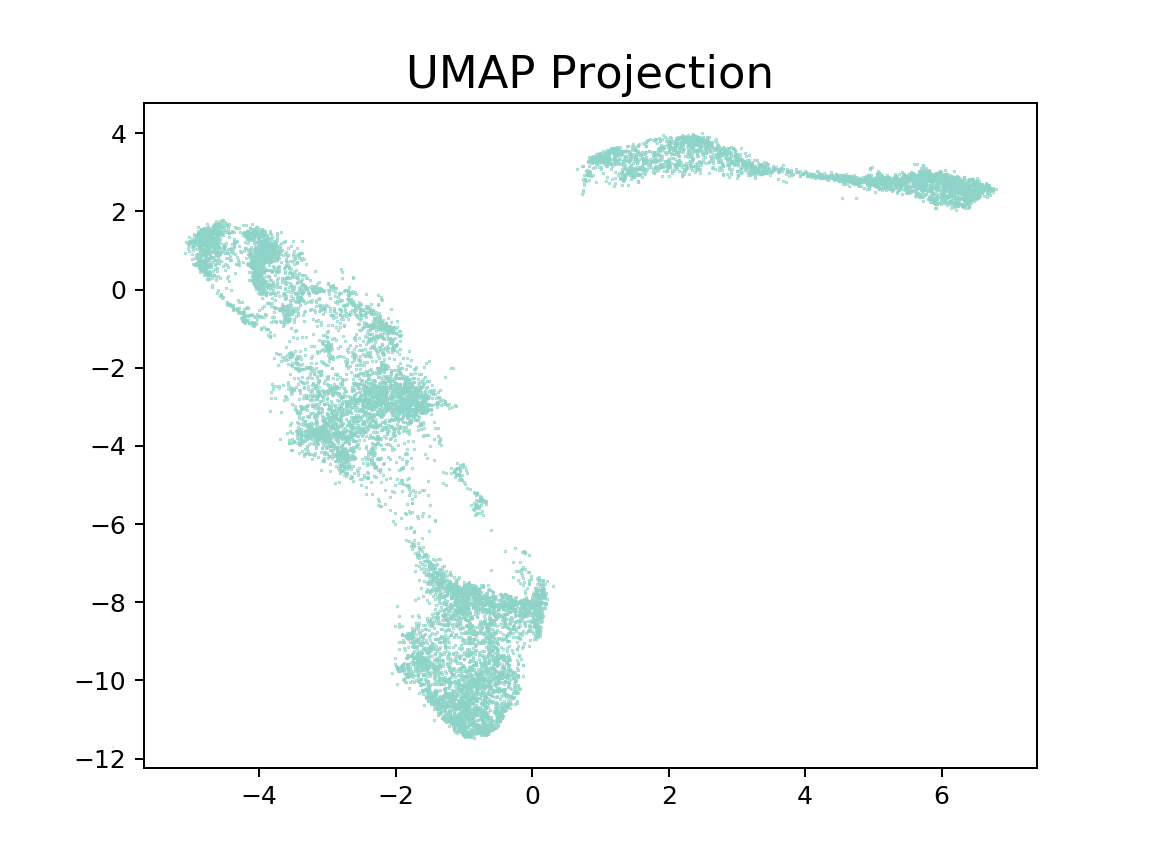

99.9158461667929 % of the data points were clustered
The HDBScan clustering yielded  4  classes


In [39]:
[umap_p, num_labels_p, UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, UMAP_hdbscan_roi_p, clusterer_p] = analysis_embedding_clustering(placebo_mat, 80, 'precomputed', 'Placebo_3', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

Embedding umap_p and umap_p2: embedding of same data
yields tremendously different clusters: is HDBScan so instable?

Does clustering of the same  embedding change?

In [44]:
# HDBScan
labels = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=50,
    cluster_selection_method='eom'
).fit_predict(umap_p)
    
    
clusterer_hdb = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=50,
    gen_min_span_tree=True,
    cluster_selection_method='eom'
).fit(umap_p)

In [45]:
np.amax(labels)

3

In [46]:
np.amax(clusterer_hdb.labels_)

3

In [66]:
np.amax(labels_leaf)

3

In [67]:
np.amax(clusterer_hdb_leaf.labels_)

3

In [48]:
labels_p2 = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=50,
    cluster_selection_method='eom'
).fit_predict(umap_p2)
    
    
clusterer_hdb_p2 = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=50,
    gen_min_span_tree=True,
    cluster_selection_method='eom'
).fit(umap_p2)

In [50]:
np.amax(labels_p2)

16

In [51]:
np.amax(clusterer_hdb_p2.labels_)

16

Save variables to further work with them

Kolmogorov-Smirnov statistic to see if umap_p and umap_p2 are different? But we need code for doing it in 2D

In [68]:
from scipy import stats

HDBScan seems to be really instable? Ranging from 4 to 17 classes? Embedding seems quite stable? Do some statistics on that!

First look more into clustering

<IPython.core.display.Javascript object>


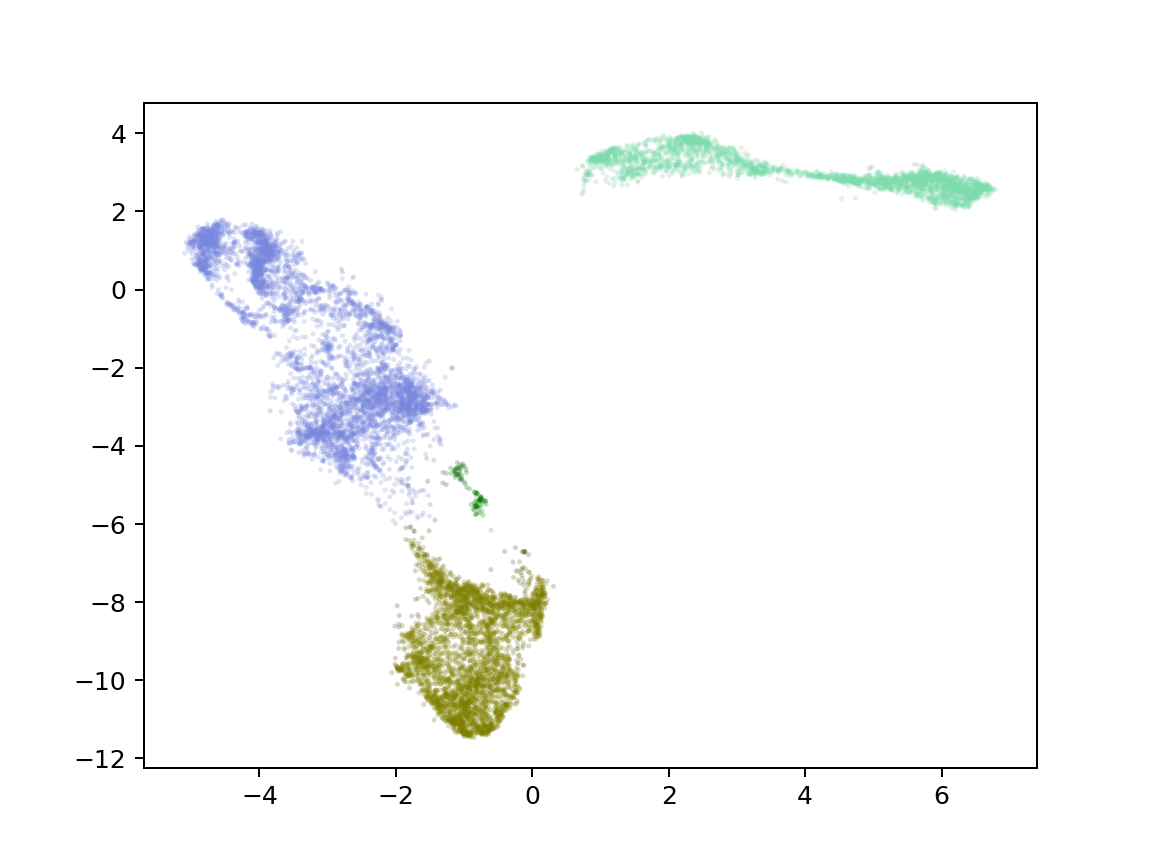

In [60]:
%matplotlib notebook
color_palette = sns.color_palette(colors17)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer_hdb.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer_hdb.probabilities_)]
plt.scatter(umap_p[:,0], umap_p[:,1], s=4, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/alternative_hdbscan_plot.png')

<IPython.core.display.Javascript object>


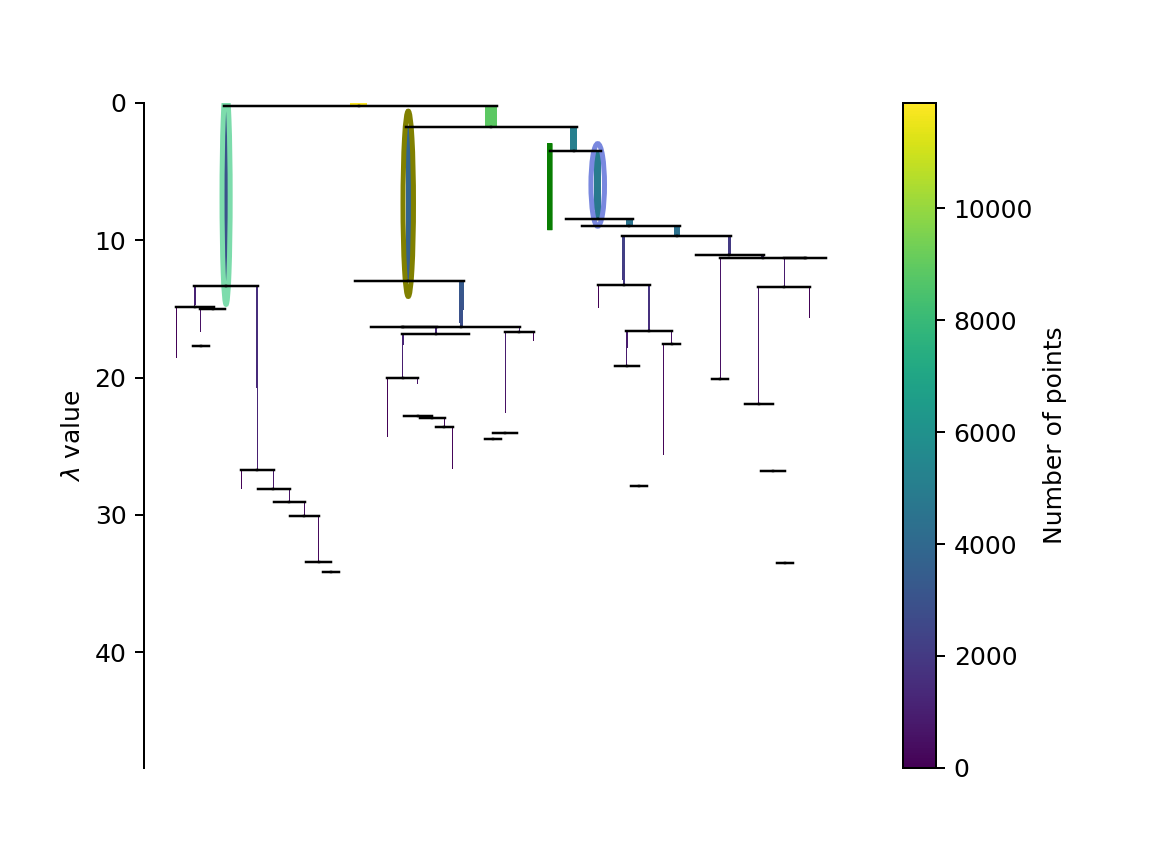

In [59]:
%matplotlib notebook

clusterer_hdb.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette(colors17))

plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/condensed_tree.png')

<IPython.core.display.Javascript object>


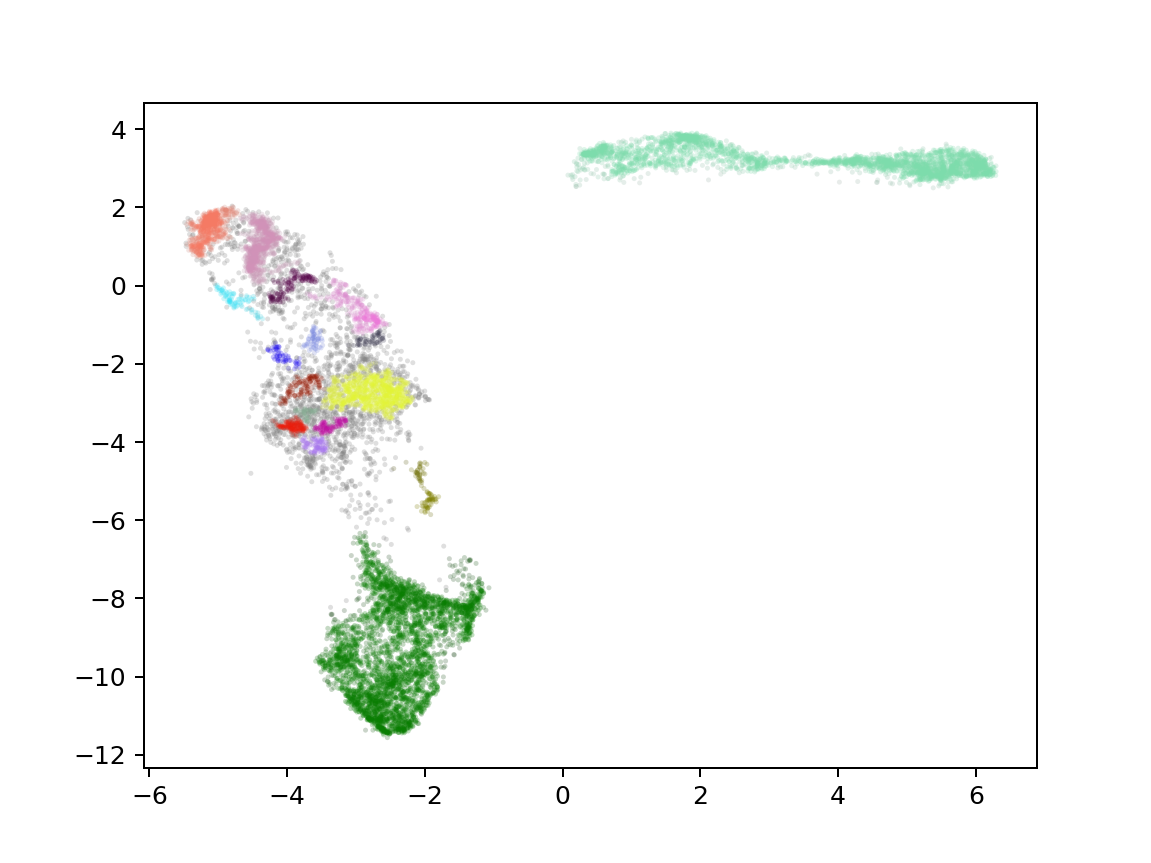

In [57]:
%matplotlib notebook
color_palette = sns.color_palette(colors17)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer_hdb_p2.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer_hdb_p2.probabilities_)]
plt.scatter(umap_p2[:,0], umap_p2[:,1], s=4, linewidth=0, c=cluster_member_colors, alpha=0.25)
#plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/alternative_hdbscan_plot.png')

<IPython.core.display.Javascript object>


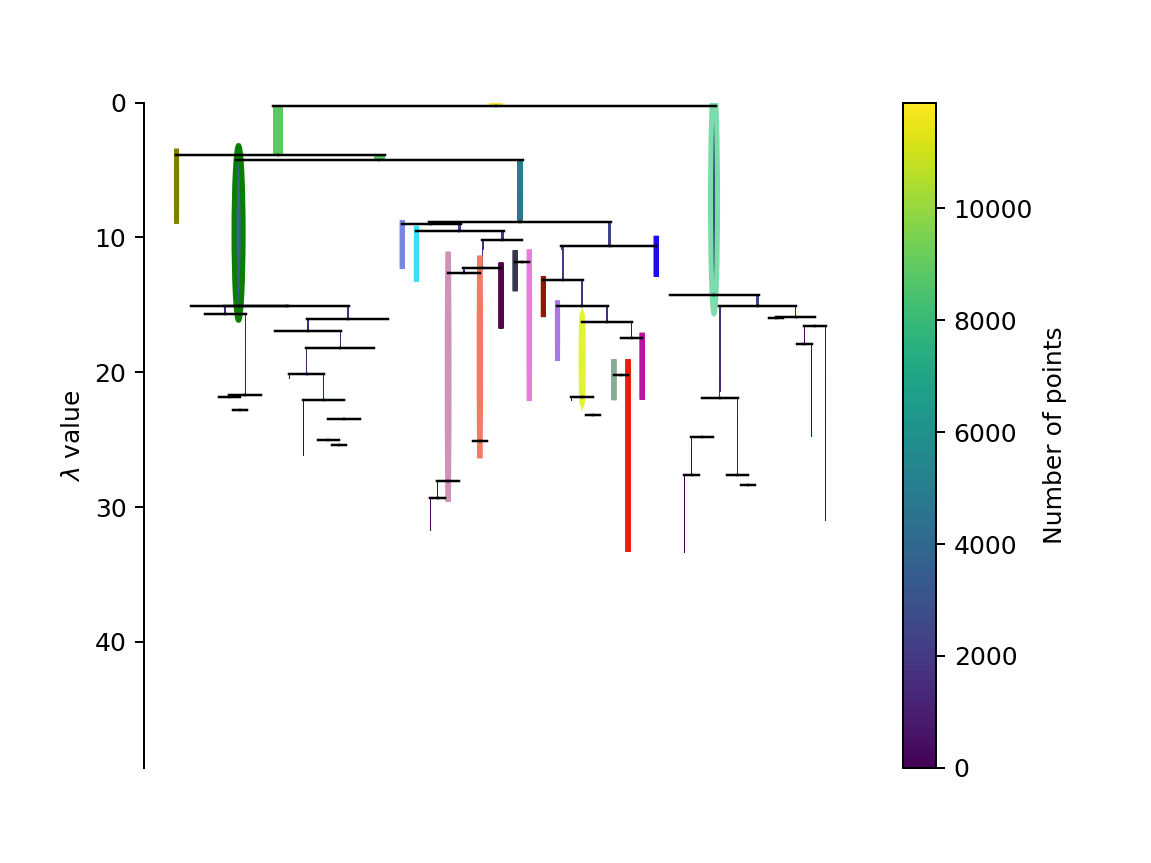

In [58]:
%matplotlib notebook

clusterer_hdb_p2.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette(colors17))

plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/condensed_tree.png')

<IPython.core.display.Javascript object>


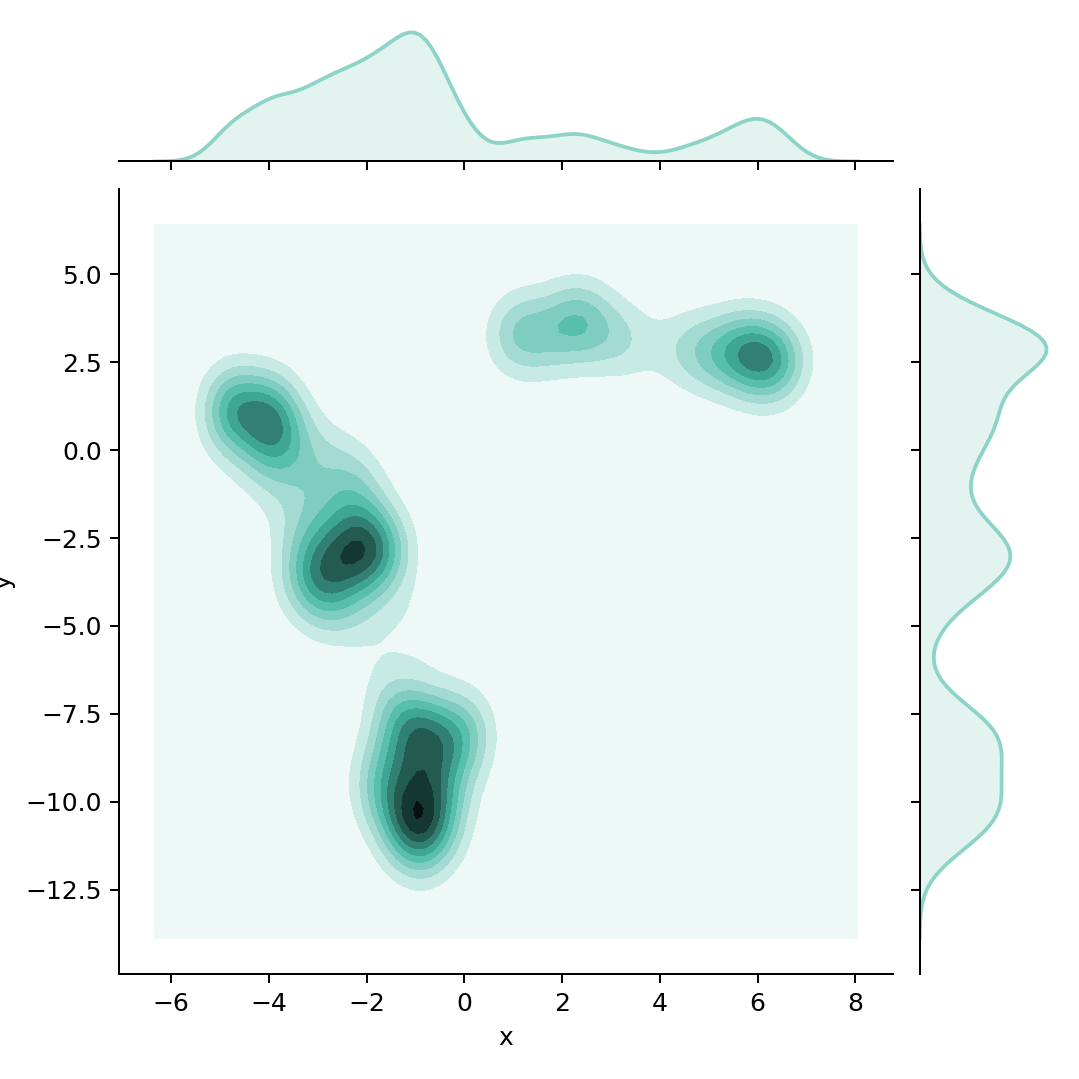

In [73]:
umap_p_df= pd.DataFrame(umap_p)
umap_p_df.columns = ['x', 'y']
densitiy_plot = sns.jointplot(x="x", y="y", data=umap_p_df, kind="kde");
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/density_plot.png')

<IPython.core.display.Javascript object>


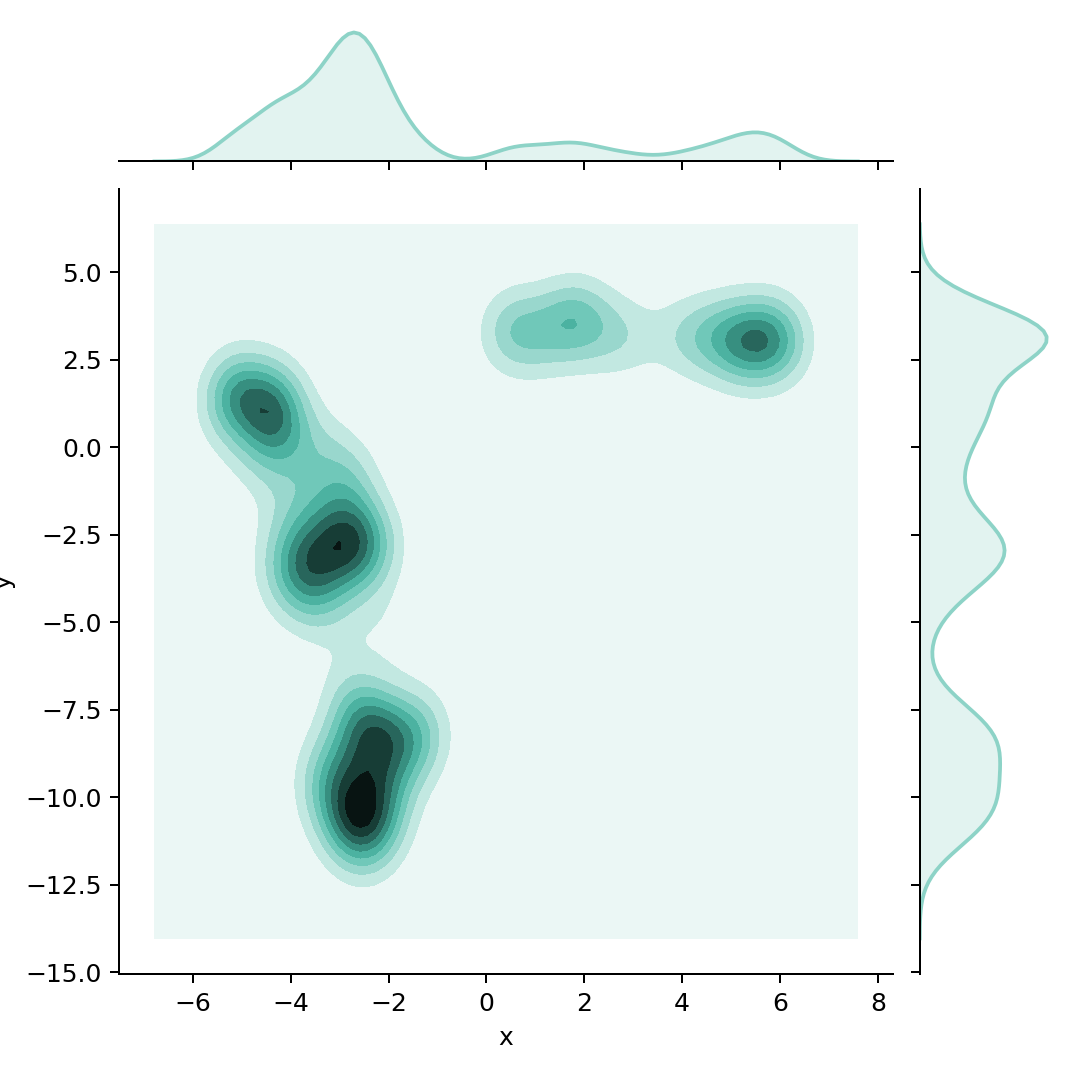

In [74]:
umap_p2_df= pd.DataFrame(umap_p2)
umap_p2_df.columns = ['x', 'y']
densitiy_plot = sns.jointplot(x="x", y="y", data=umap_p2_df, kind="kde");
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/density_plot.png')

<IPython.core.display.Javascript object>


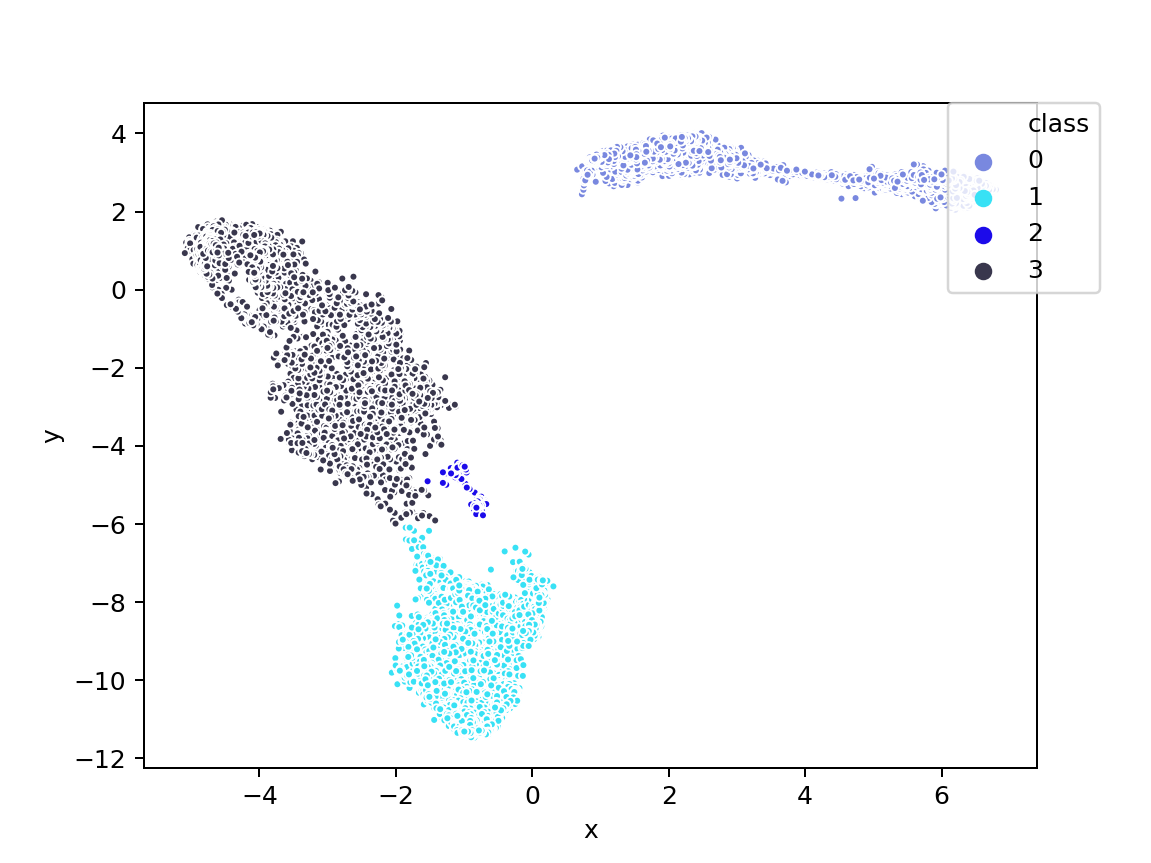

In [40]:
plotting_hdbscan(UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, colors4, '/Users/jenniferthem/Masterthesis_Data', 'Placebo')

In [ ]:
densitiy_plot = sns.jointplot(x="x", y="y", data=umap_sel_df, kind="kde");
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Plots/density_plot.png')

In [ ]:
plotting_rois(UMAP_hdbscan_labels_df_p, UMAP_roi_df_p, clustered_p, colors18, '/Users/jenniferthem/Masterthesis_Data', 'Placebo')

In [ ]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi_p, 14, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')
display(clu_roi_dic)

In [ ]:
# HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    
    clusterer_hdb = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        gen_min_span_tree=True,
        cluster_selection_method=cluster_selection_method
    ).fit(embedding)

Testing it out with 50 nearest neighbors to have a more fine grained resolution with the NAcc

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


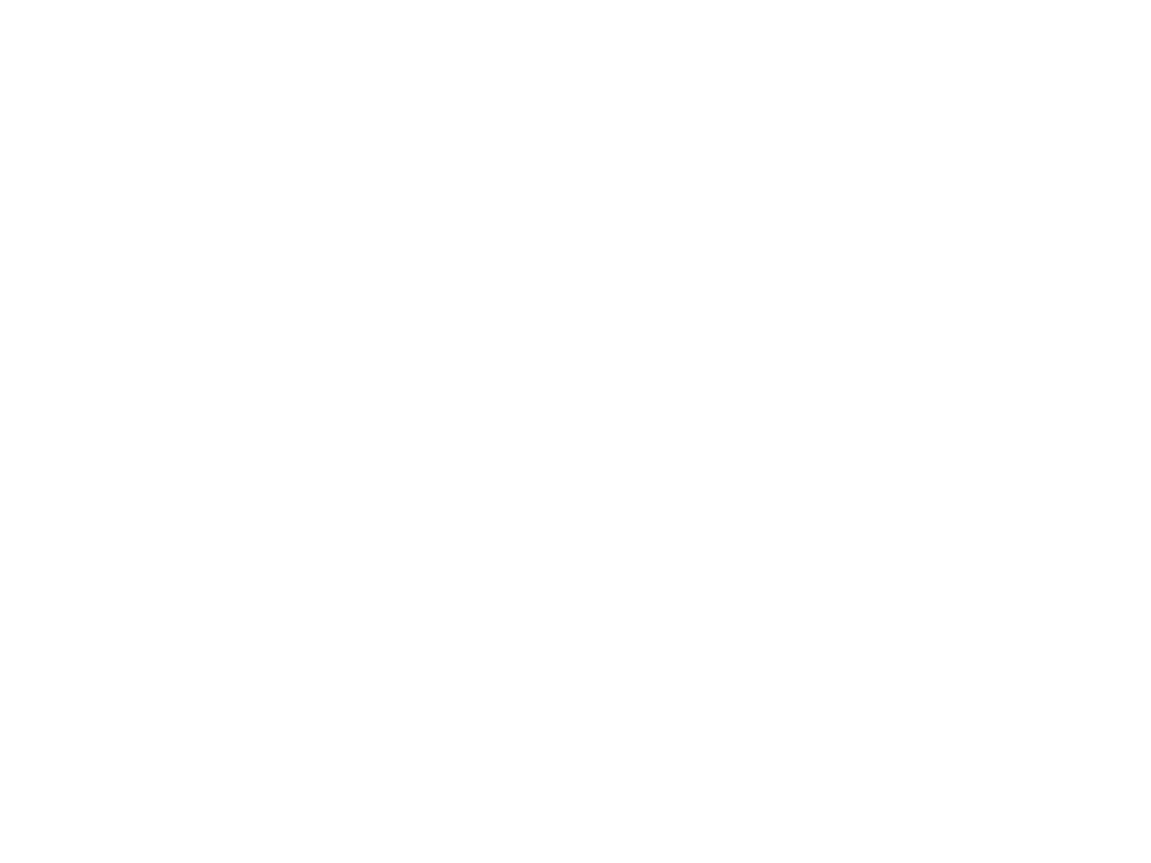

100.0 % of the data points were clustered
The HDBScan clustering yielded  2  classes


In [8]:
[umap_p_50, num_labels_p_50, UMAP_hdbscan_labels_df_p_50, UMAP_roi_df_p_50, clustered_p_50, UMAP_hdbscan_roi_p_50, clusterer_p_50] = analysis_embedding_clustering(placebo_mat, 50, 'precomputed', 'Placebo_n50', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


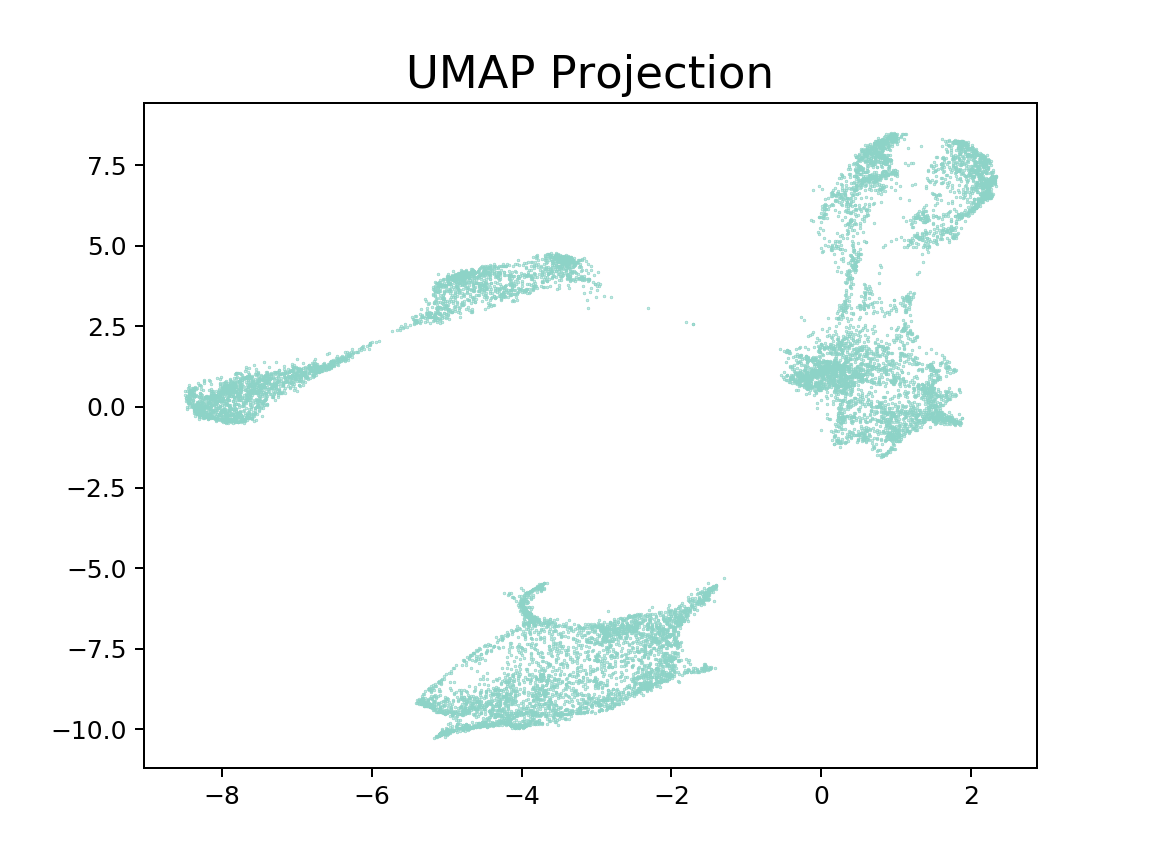

93.39392409324245 % of the data points were clustered
The HDBScan clustering yielded  15  classes


In [9]:
[umap_k_50, num_labels_k_50, UMAP_hdbscan_labels_df_k_50, UMAP_roi_df_k_50, clustered_k_50, UMAP_hdbscan_roi_k_50, clusterer_k_50] = analysis_embedding_clustering(ket_mat, 50, 'precomputed', 'Ket_n50', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

In [15]:
roi_labels[9000]

array(['Putamen'], dtype=object)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


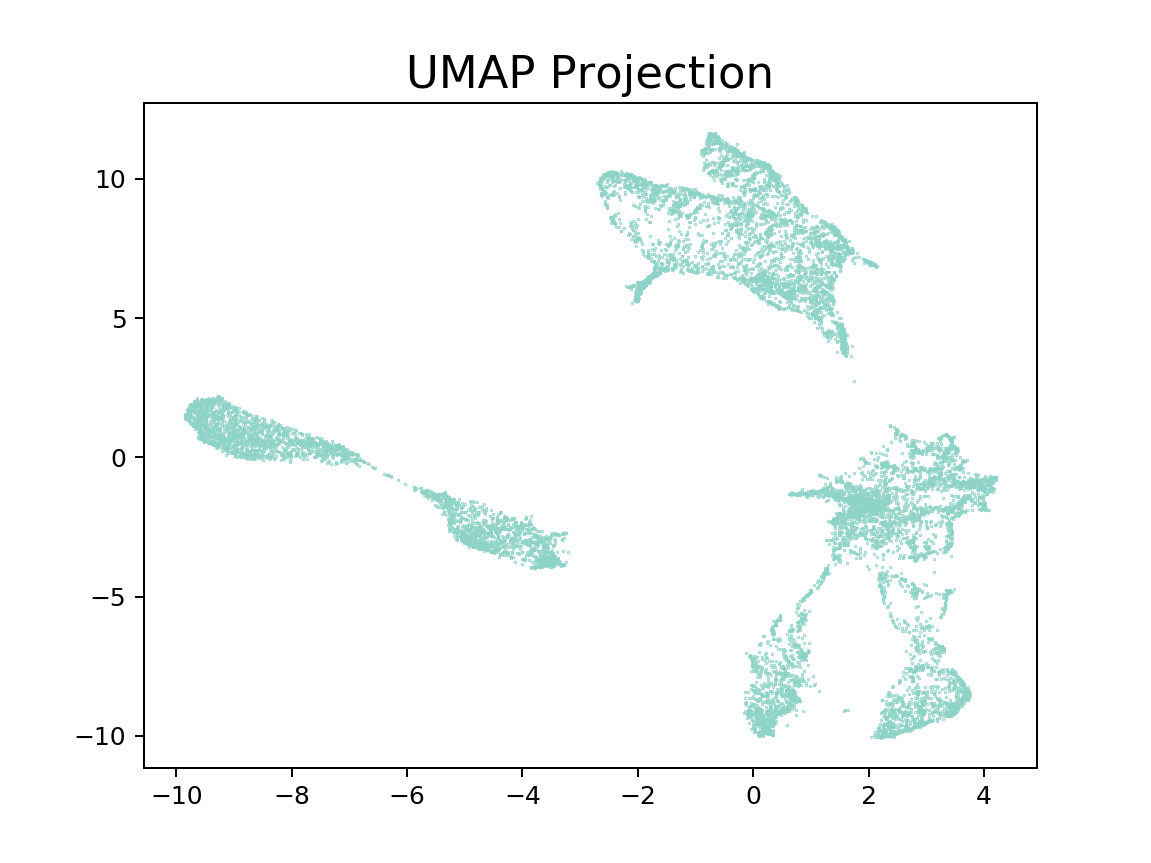

99.72229235041657 % of the data points were clustered
The HDBScan clustering yielded  7  classes


In [20]:
[umap_k_50, num_labels_k_50, UMAP_hdbscan_labels_df_k_50, UMAP_roi_df_k_50, clustered_k_50, UMAP_hdbscan_roi_k_50, clusterer_k_50] = analysis_embedding_clustering(ket_mat, 20, 'precomputed', 'Ket_n20', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)

### Testing results with random_state=50 instead of random number

Conclusion: if you set the random_state to a constant, the UMAP and HDBScan results are stable

In [9]:
# data, neighbors: how many next neighbors: int, name: how to call the resulting file: String, sav_path: output directory: string, roi_labels_df: DataFrame
def analysis_embedding_clustering_test(data, neighbors, metric, name, sav_path, cluster_selection_method, roi_labels_df):
    
    # UMAP embedding
    embedding = umap.UMAP(
        n_neighbors=neighbors,
        n_components=2,
        min_dist=0.0, # best for clustering
        metric=metric,
        random_state=50
    ).fit_transform(data)
    
    # save umap results as dataframe
    embedding_df = pd.DataFrame(embedding)
    # set name for saving
    name_umap = 'UMAP_' + name
    # save umap result
    np.save(os.path.join(sav_path, name_umap), embedding)

    # plot the embedding 
    %matplotlib notebook
    plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral');
    plt.title('UMAP Projection', fontsize=18);
    # save plot
    plt.savefig(os.path.join(sav_path, 'Plots', name_umap))
    
    
    # HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    
    clusterer_hdb = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=50,
        gen_min_span_tree=True,
        cluster_selection_method=cluster_selection_method
    ).fit(embedding)
    
    
    num_labels = np.amax(labels)+1
    
        
    clustered = (labels >= 0)
    
    labels_df = pd.DataFrame(labels)
    
    # concatenation of umap results and roi labels
    UMAP_roi_df = pd.concat([embedding_df, roi_labels_df], axis=1)
    # renaming
    UMAP_roi_df.columns = ['x', 'y', 'ROI']
    # saving dataframe
    name_sav_umap_roi = 'UMAP_ROI_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_roi))
    
    # concatenation of umap results and hdbscan labels
    UMAP_hdbscan_labels_df = pd.concat([embedding_df, labels_df], axis =1)
    # renaming 
    UMAP_hdbscan_labels_df.columns = ['x', 'y', 'class']
    # saving dataframe
    name_sav_umap_hdbscan = 'UMAP_HDBScan_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_hdbscan))
    
    # UMAP results with HDBScan label & ROI label
    UMAP_hdbscan_roi = pd.concat([UMAP_hdbscan_labels_df, roi_labels_df], axis=1)
    UMAP_hdbscan_roi.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
    name_sav_all = 'UMAP_HDBScan_ROI_' + name
    UMAP_hdbscan_roi.to_pickle(os.path.join(sav_path, name_sav_all))
    
    percent_clustered = (np.sum(clustered) / embedding.shape[0])*100
    print(percent_clustered, '% of the data points were clustered')
    print('The HDBScan clustering yielded ', num_labels, ' classes')
    
    return embedding,num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi, clusterer_hdb


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


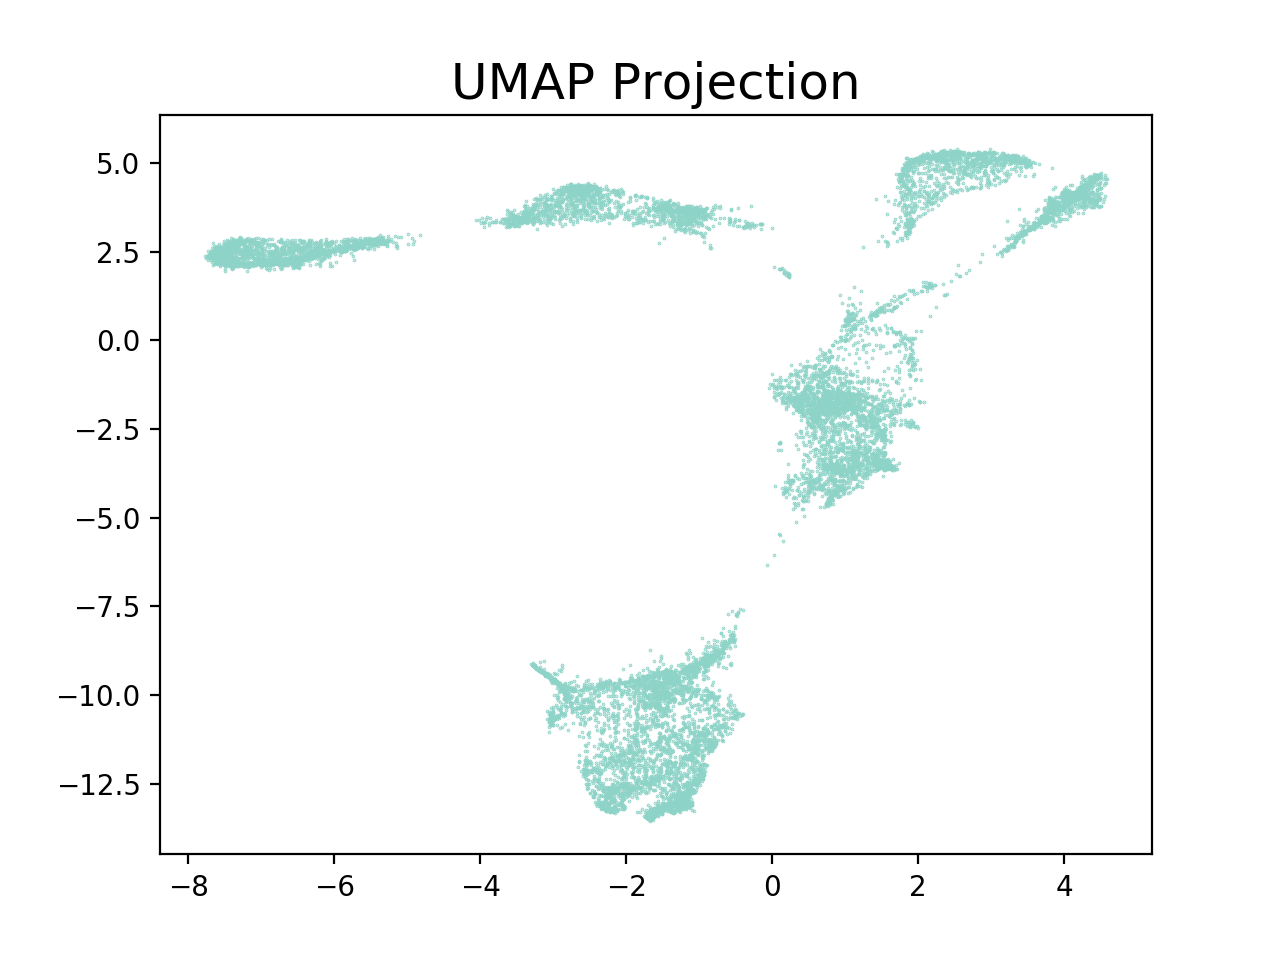

99.73070773373726 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [11]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering_test(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


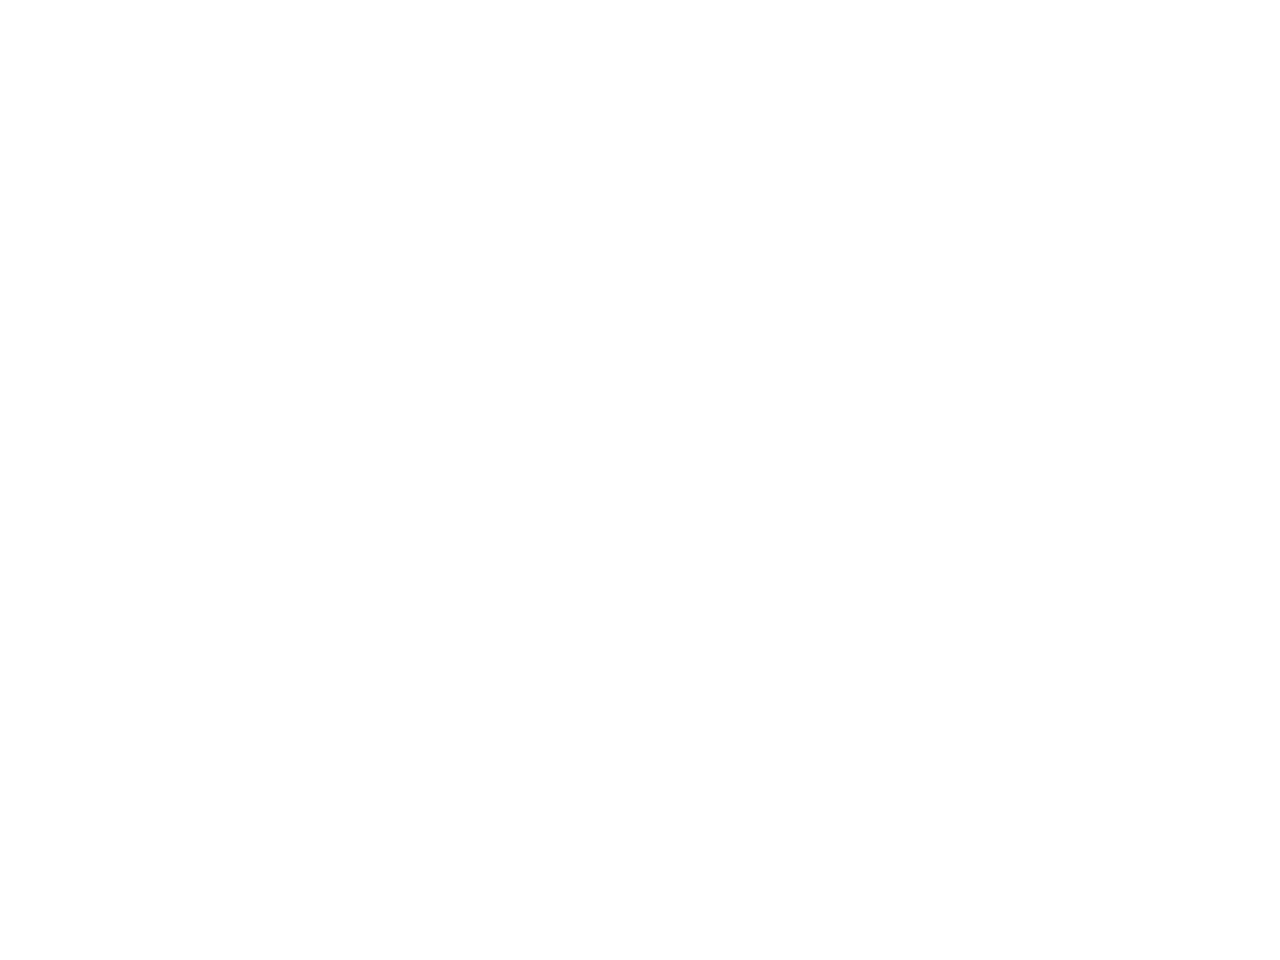

99.73070773373726 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [12]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering_test(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


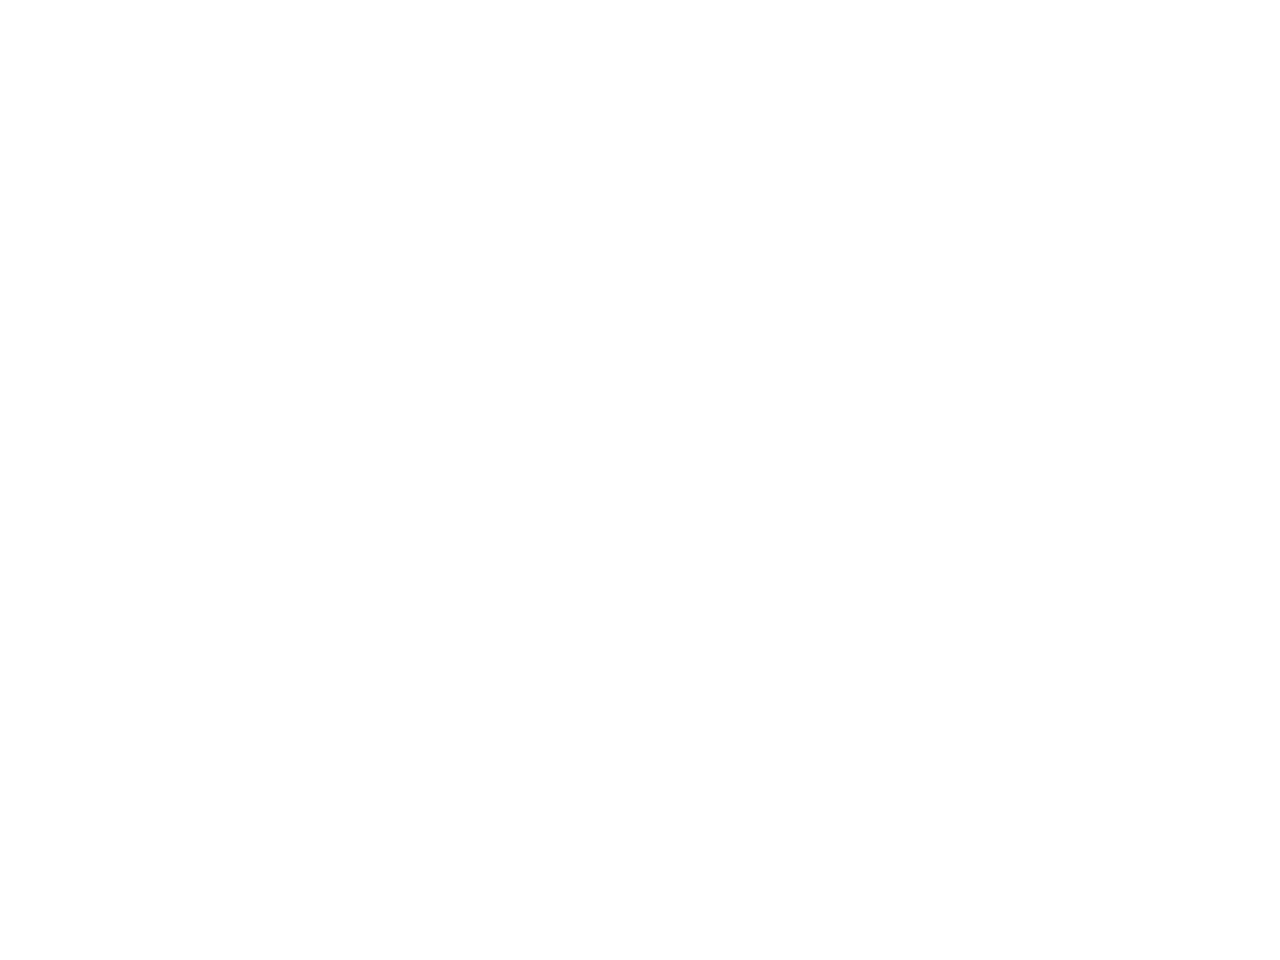

99.73070773373726 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [18]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering_test(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


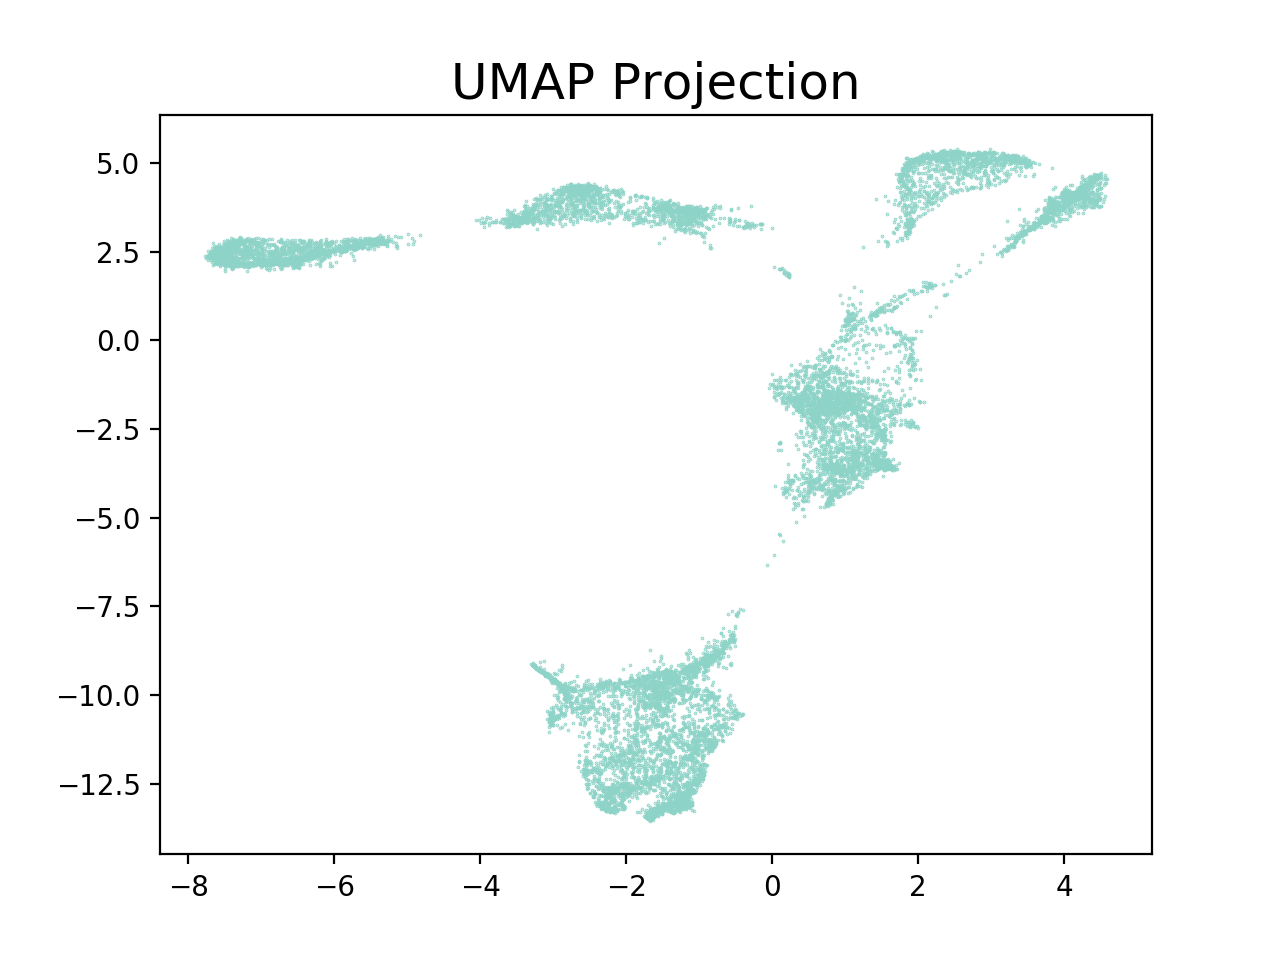

99.73070773373726 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [19]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering_test(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


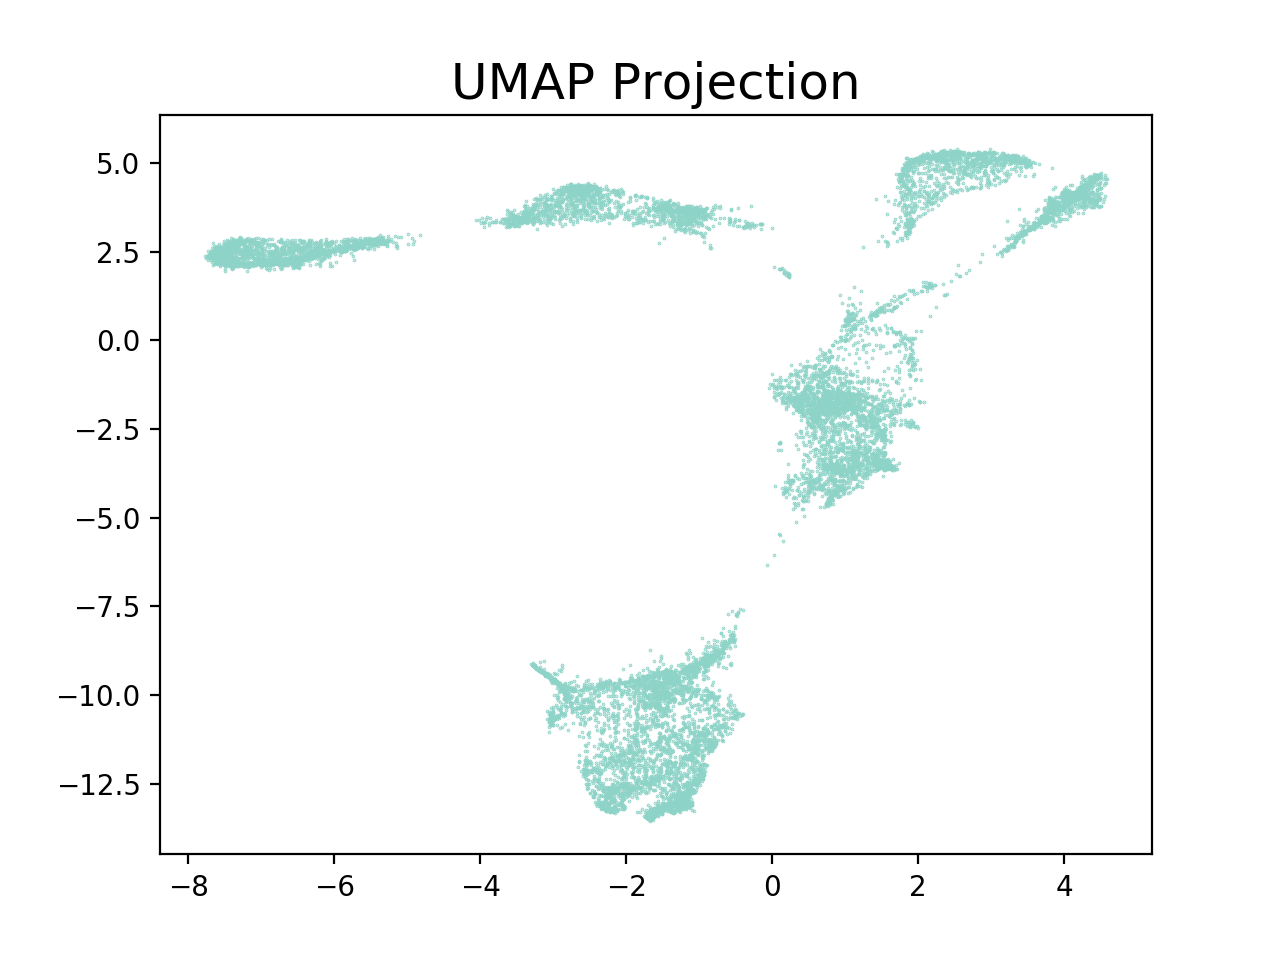

99.73070773373726 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [13]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


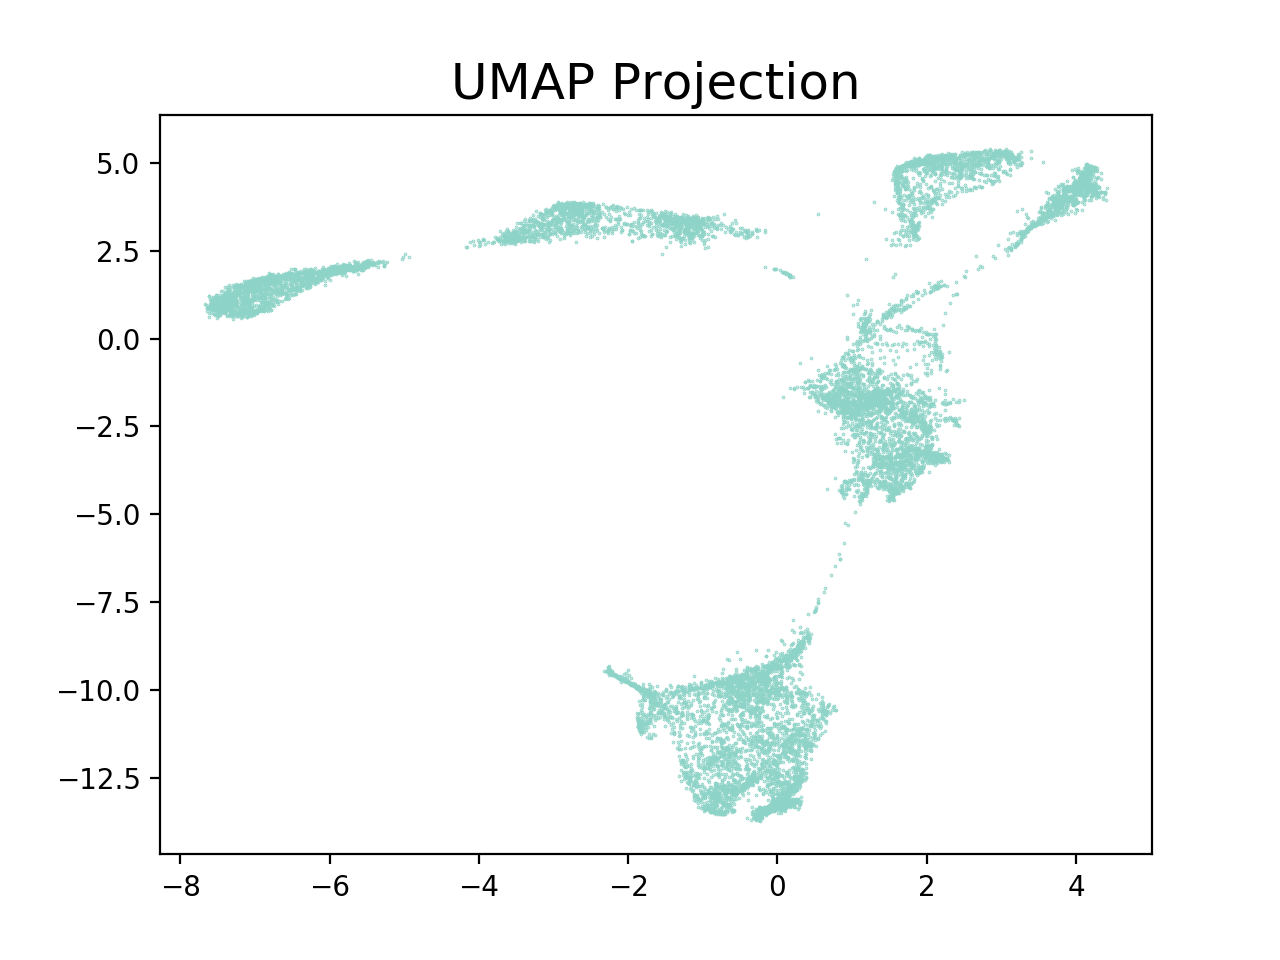

99.68863081713371 % of the data points were clustered
The HDBScan clustering yielded  6  classes


In [16]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)


/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/umap_.py:1461: UserWarning: Using precomputed metric; transform will be unavailable for new data
  "Using precomputed metric; transform will be unavailable for new data"


<IPython.core.display.Javascript object>


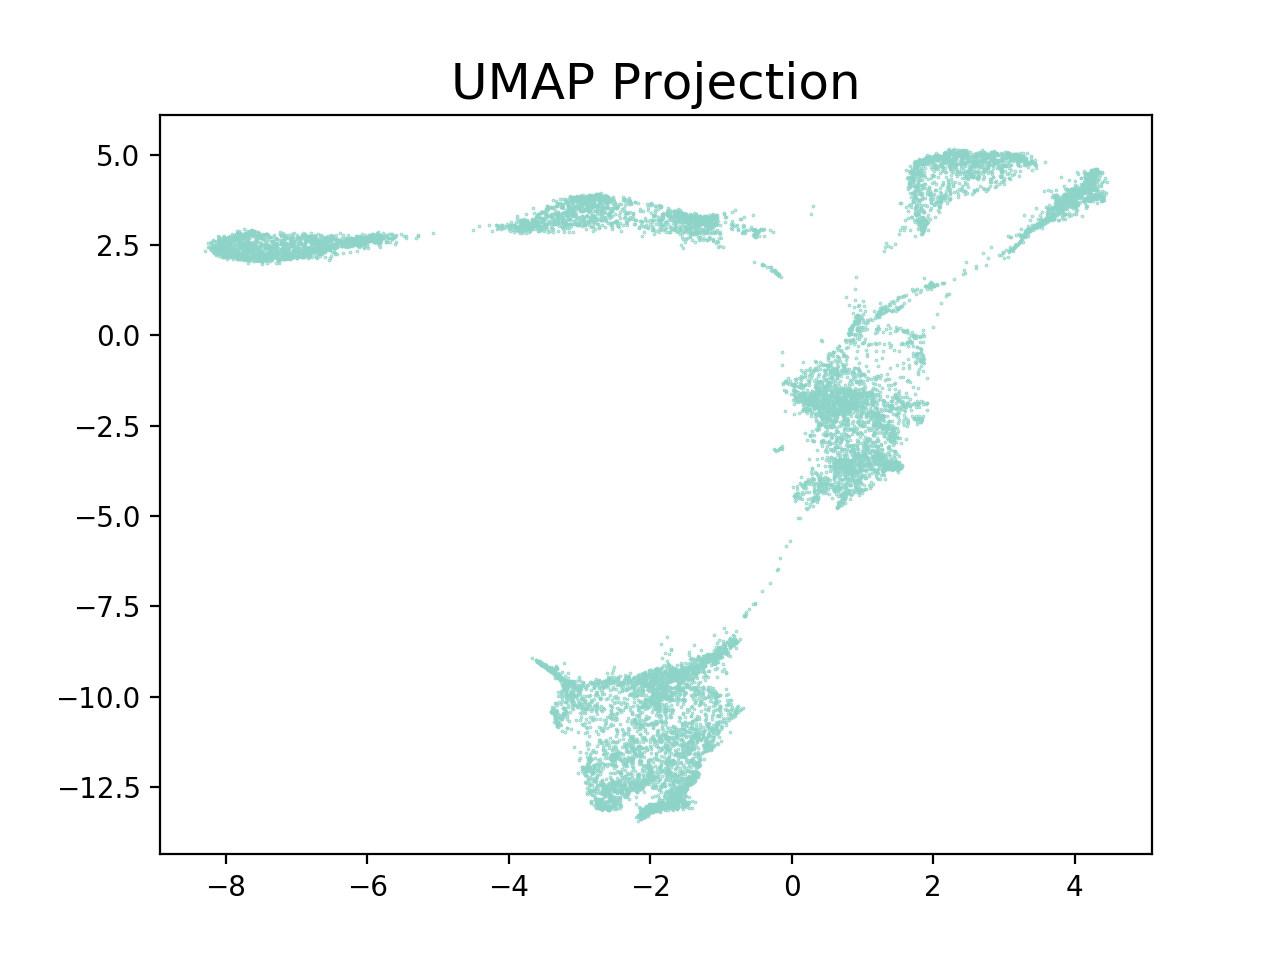

98.02238491963308 % of the data points were clustered
The HDBScan clustering yielded  10  classes


In [17]:
[emb, sum_labels_test, UMAPhdbscan_labels_test, UMAPROI_test, clustered_test, UMAPhdbscan_roi_test, clusterer_test] = analysis_embedding_clustering(baseline_mat, 80, 'precomputed', 'Baseline2', '/Users/jenniferthem/Masterthesis_Data', 'eom', roi_labels_df)
